# 📦 Imports and Setup

In [293]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,precision_recall_curve
from sklearn.calibration import calibration_curve
pd.set_option('display.max_columns',None)
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
sns.despine()

<Figure size 640x480 with 0 Axes>

# 📁 Data Loading

In [295]:
df=pd.read_csv("C:\\Users\\astra\\Documents\\Python_notebooks\\Fannie Mae\\FannieMae_raw\\stat\\df_final_combined.csv")

In [296]:
df.head()

,Unnamed: 0.1,Unnamed: 0,LOAN_ID,ACT_PERIOD,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,PMT_HISTORY,MOD_FLAG,TOT_SCHD_PRNCPL,FORECLOSURE_DATE,NON_INTEREST_BEARING_UPB,SERV_IND,OCLTV,MI_TYPE,FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT,DLQ4_PERIOD
0,0,0,104657170903,12004,R,7.750,7.750,29000.0,27372.19,360,121999,48.0,312.0,312.0,12030.0,94,2.0,55.0,641.0,649.0,N,P,CO,1,S,OK,0,730.0,30.0,0,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1,1,1,105077791942,12004,R,7.625,7.625,27000.0,17827.18,180,12000,47.0,133.0,93.0,22015.0,78,2.0,22.0,752.0,731.0,N,P,SF,1,P,GA,12260,308.0,NaN,0,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
2,2,2,105367116671,12004,R,8.375,8.375,39000.0,37266.56,360,111999,49.0,311.0,310.0,122029.0,63,3.0,NaN,795.0,796.0,N,R,CO,1,P,FL,33100,334.0,NaN,0,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
3,3,3,106816481696,12004,R,8.125,8.125,18000.0,16016.48,360,12000,47.0,313.0,241.0,22030.0,19,1.0,4.0,769.0,NaN,N,R,SF,1,P,SC,0,299.0,NaN,0,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
4,4,4,107550034405,12004,C,8.125,8.125,63000.0,60615.02,360,121999,48.0,312.0,311.0,12030.0,75,2.0,45.0,680.0,NaN,N,P,CO,1,P,FL,33100,334.0,NaN,0,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN


In [297]:
df=df.drop(['Unnamed: 0.1','Unnamed: 0','TOT_SCHD_PRNCPL','NON_INTEREST_BEARING_UPB','LOAN_AGE','REM_MONTHS','ADJ_REM_MONTHS'
            ,'PMT_HISTORY','FORECLOSURE_DATE','FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT','ACT_PERIOD'],axis=1)

In [298]:
df.head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD
0,104657170903,R,7.750,7.750,29000.0,27372.19,360,121999,12030.0,94,2.0,55.0,641.0,649.0,N,P,CO,1,S,OK,0,730.0,30.0,0,N,N,NaN,NaN,NaN
1,105077791942,R,7.625,7.625,27000.0,17827.18,180,12000,22015.0,78,2.0,22.0,752.0,731.0,N,P,SF,1,P,GA,12260,308.0,NaN,0,N,N,NaN,NaN,NaN
2,105367116671,R,8.375,8.375,39000.0,37266.56,360,111999,122029.0,63,3.0,NaN,795.0,796.0,N,R,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,NaN
3,106816481696,R,8.125,8.125,18000.0,16016.48,360,12000,22030.0,19,1.0,4.0,769.0,NaN,N,R,SF,1,P,SC,0,299.0,NaN,0,N,N,NaN,NaN,NaN
4,107550034405,C,8.125,8.125,63000.0,60615.02,360,121999,12030.0,75,2.0,45.0,680.0,NaN,N,P,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,NaN


In [299]:
#Extract origination quarters
df_temp=[]
df_temp=pd.DataFrame(df['ORIG_DATE'].astype(str).apply(lambda x:x[:1] if len(x)==5 else x[:2]))
df_temp.columns=['ORIG_MONTH'] 
df_temp['ORIG_YEAR']=df['ORIG_DATE'].astype(str).apply(lambda x:x[-4:])

def qtr(x):
    if x<=3:
        return 'Q1'
    elif x>3 and x<=6:
        return 'Q2'
    elif x>6 and x<=9:
        return 'Q3'
    else: return 'Q4'   

df_temp['ORIG_QTR']=df_temp['ORIG_MONTH'].astype(int).apply(qtr)
df_temp['ORIG_QTRYEAR']=df_temp['ORIG_QTR']+df_temp['ORIG_YEAR']

df_main=pd.concat([df,df_temp],axis=1)

In [300]:
df_main.head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD,ORIG_MONTH,ORIG_YEAR,ORIG_QTR,ORIG_QTRYEAR
0,104657170903,R,7.750,7.750,29000.0,27372.19,360,121999,12030.0,94,2.0,55.0,641.0,649.0,N,P,CO,1,S,OK,0,730.0,30.0,0,N,N,NaN,NaN,NaN,12,1999,Q4,Q41999
1,105077791942,R,7.625,7.625,27000.0,17827.18,180,12000,22015.0,78,2.0,22.0,752.0,731.0,N,P,SF,1,P,GA,12260,308.0,NaN,0,N,N,NaN,NaN,NaN,1,2000,Q1,Q12000
2,105367116671,R,8.375,8.375,39000.0,37266.56,360,111999,122029.0,63,3.0,NaN,795.0,796.0,N,R,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,NaN,11,1999,Q4,Q41999
3,106816481696,R,8.125,8.125,18000.0,16016.48,360,12000,22030.0,19,1.0,4.0,769.0,NaN,N,R,SF,1,P,SC,0,299.0,NaN,0,N,N,NaN,NaN,NaN,1,2000,Q1,Q12000
4,107550034405,C,8.125,8.125,63000.0,60615.02,360,121999,12030.0,75,2.0,45.0,680.0,NaN,N,P,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,NaN,12,1999,Q4,Q41999


In [301]:
df_main['ORIG_YEAR'].unique()

array(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010'], dtype=object)

In [302]:
df_main['DLQ4_PERIOD']=df_main['DLQ4_PERIOD'].fillna(0)
df_main['DLQ4_PERIOD']=df_main['DLQ4_PERIOD'].astype(int)

In [303]:
df_main.head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD,ORIG_MONTH,ORIG_YEAR,ORIG_QTR,ORIG_QTRYEAR
0,104657170903,R,7.750,7.750,29000.0,27372.19,360,121999,12030.0,94,2.0,55.0,641.0,649.0,N,P,CO,1,S,OK,0,730.0,30.0,0,N,N,NaN,NaN,0,12,1999,Q4,Q41999
1,105077791942,R,7.625,7.625,27000.0,17827.18,180,12000,22015.0,78,2.0,22.0,752.0,731.0,N,P,SF,1,P,GA,12260,308.0,NaN,0,N,N,NaN,NaN,0,1,2000,Q1,Q12000
2,105367116671,R,8.375,8.375,39000.0,37266.56,360,111999,122029.0,63,3.0,NaN,795.0,796.0,N,R,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,0,11,1999,Q4,Q41999
3,106816481696,R,8.125,8.125,18000.0,16016.48,360,12000,22030.0,19,1.0,4.0,769.0,NaN,N,R,SF,1,P,SC,0,299.0,NaN,0,N,N,NaN,NaN,0,1,2000,Q1,Q12000
4,107550034405,C,8.125,8.125,63000.0,60615.02,360,121999,12030.0,75,2.0,45.0,680.0,NaN,N,P,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,0,12,1999,Q4,Q41999


In [304]:
df_main['DLQ4_PERIOD'].dtype

dtype('int32')

In [305]:
df_main[df_main['DLQ4_PERIOD']!=0.0].head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD,ORIG_MONTH,ORIG_YEAR,ORIG_QTR,ORIG_QTRYEAR
22,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,102004,1,2000,Q1,Q12000
23,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,112004,1,2000,Q1,Q12000
24,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,82005,1,2000,Q1,Q12000
25,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,102005,1,2000,Q1,Q12000
26,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,112005,1,2000,Q1,Q12000


In [306]:
#Extract DPD90+ qtrs
df_temp=[]
df_temp=pd.DataFrame(df_main['DLQ4_PERIOD'].astype(str).apply(lambda x:x[:1] if len(x)==5 else x[:2]))
df_temp.columns=['DLQ4_MONTH'] 
df_temp['DLQ4_YEAR']=df_main['DLQ4_PERIOD'].astype(str).apply(lambda x:x[-4:])

def qtr(x):
    if x==0:
        return '0'
    elif x<=3 and x>0:
        return 'Q1'
    elif x>3 and x<=6:
        return 'Q2'
    elif x>6 and x<=9:
        return 'Q3'
    else: return 'Q4'   


df_temp['DLQ4_QTR']=df_temp['DLQ4_MONTH'].astype(int).apply(qtr)
df_temp['DLQ4_QTRYEAR']=df_temp['DLQ4_QTR']+df_temp['DLQ4_YEAR']

df_main_new=pd.concat([df_main,df_temp],axis=1)

In [307]:
df_main_new.head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD,ORIG_MONTH,ORIG_YEAR,ORIG_QTR,ORIG_QTRYEAR,DLQ4_MONTH,DLQ4_YEAR,DLQ4_QTR,DLQ4_QTRYEAR
0,104657170903,R,7.750,7.750,29000.0,27372.19,360,121999,12030.0,94,2.0,55.0,641.0,649.0,N,P,CO,1,S,OK,0,730.0,30.0,0,N,N,NaN,NaN,0,12,1999,Q4,Q41999,0,0,0,00
1,105077791942,R,7.625,7.625,27000.0,17827.18,180,12000,22015.0,78,2.0,22.0,752.0,731.0,N,P,SF,1,P,GA,12260,308.0,NaN,0,N,N,NaN,NaN,0,1,2000,Q1,Q12000,0,0,0,00
2,105367116671,R,8.375,8.375,39000.0,37266.56,360,111999,122029.0,63,3.0,NaN,795.0,796.0,N,R,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,0,11,1999,Q4,Q41999,0,0,0,00
3,106816481696,R,8.125,8.125,18000.0,16016.48,360,12000,22030.0,19,1.0,4.0,769.0,NaN,N,R,SF,1,P,SC,0,299.0,NaN,0,N,N,NaN,NaN,0,1,2000,Q1,Q12000,0,0,0,00
4,107550034405,C,8.125,8.125,63000.0,60615.02,360,121999,12030.0,75,2.0,45.0,680.0,NaN,N,P,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,0,12,1999,Q4,Q41999,0,0,0,00


In [308]:
df_main_new[df_main_new['DLQ4_QTRYEAR']!='00'].head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD,ORIG_MONTH,ORIG_YEAR,ORIG_QTR,ORIG_QTRYEAR,DLQ4_MONTH,DLQ4_YEAR,DLQ4_QTR,DLQ4_QTRYEAR
22,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,102004,1,2000,Q1,Q12000,10,2004,Q4,Q42004
23,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,112004,1,2000,Q1,Q12000,11,2004,Q4,Q42004
24,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,82005,1,2000,Q1,Q12000,8,2005,Q3,Q32005
25,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,102005,1,2000,Q1,Q12000,10,2005,Q4,Q42005
26,130549294764,R,8.0,8.0,140000.0,141499.81,360,12000,32030.0,95,1.0,54.0,641.0,NaN,N,P,SF,1,P,SC,17900,290.0,30.0,1,Y,N,NaN,NaN,112005,1,2000,Q1,Q12000,11,2005,Q4,Q42005


In [309]:
convert_dict={'ORIG_MONTH':int,'ORIG_YEAR':int,'DLQ4_MONTH':int,'DLQ4_YEAR':int}
df_main_new=df_main_new.astype(convert_dict)

#df_main_new=df_main_new.drop(['ORIG_MONTH',
#       'ORIG_YEAR', 'ORIG_QTR','DLQ4_MONTH', 'DLQ4_YEAR',
#       'DLQ4_QTR'],axis=1)

In [310]:
df_main_new.head()

,LOAN_ID,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,DLQ_STATUS,MOD_FLAG,SERV_IND,OCLTV,MI_TYPE,DLQ4_PERIOD,ORIG_MONTH,ORIG_YEAR,ORIG_QTR,ORIG_QTRYEAR,DLQ4_MONTH,DLQ4_YEAR,DLQ4_QTR,DLQ4_QTRYEAR
0,104657170903,R,7.750,7.750,29000.0,27372.19,360,121999,12030.0,94,2.0,55.0,641.0,649.0,N,P,CO,1,S,OK,0,730.0,30.0,0,N,N,NaN,NaN,0,12,1999,Q4,Q41999,0,0,0,00
1,105077791942,R,7.625,7.625,27000.0,17827.18,180,12000,22015.0,78,2.0,22.0,752.0,731.0,N,P,SF,1,P,GA,12260,308.0,NaN,0,N,N,NaN,NaN,0,1,2000,Q1,Q12000,0,0,0,00
2,105367116671,R,8.375,8.375,39000.0,37266.56,360,111999,122029.0,63,3.0,NaN,795.0,796.0,N,R,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,0,11,1999,Q4,Q41999,0,0,0,00
3,106816481696,R,8.125,8.125,18000.0,16016.48,360,12000,22030.0,19,1.0,4.0,769.0,NaN,N,R,SF,1,P,SC,0,299.0,NaN,0,N,N,NaN,NaN,0,1,2000,Q1,Q12000,0,0,0,00
4,107550034405,C,8.125,8.125,63000.0,60615.02,360,121999,12030.0,75,2.0,45.0,680.0,NaN,N,P,CO,1,P,FL,33100,334.0,NaN,0,N,N,NaN,NaN,0,12,1999,Q4,Q41999,0,0,0,00


# 🧮 EDA on Categorical Variables

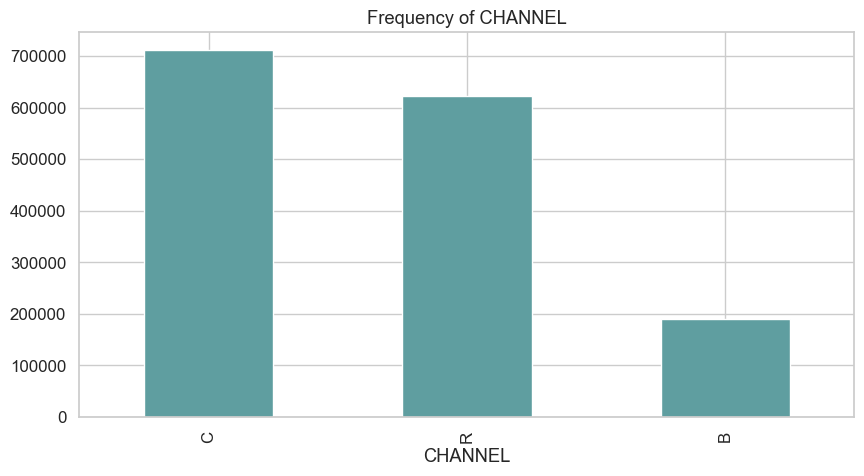

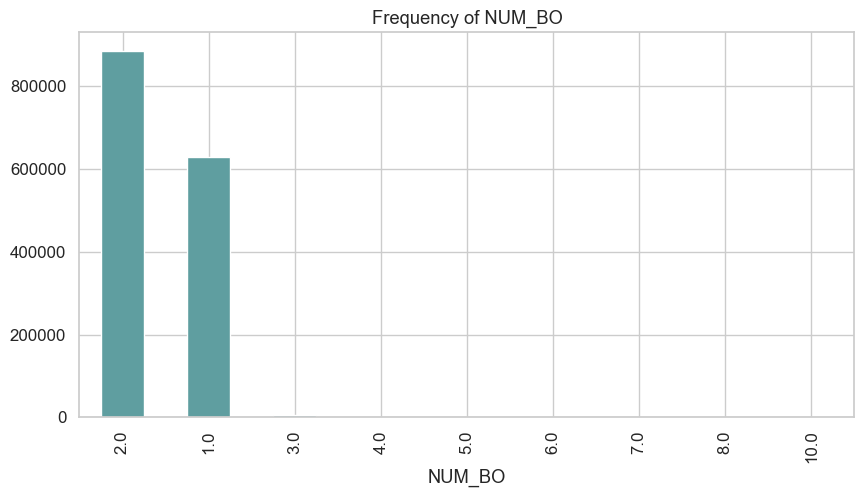

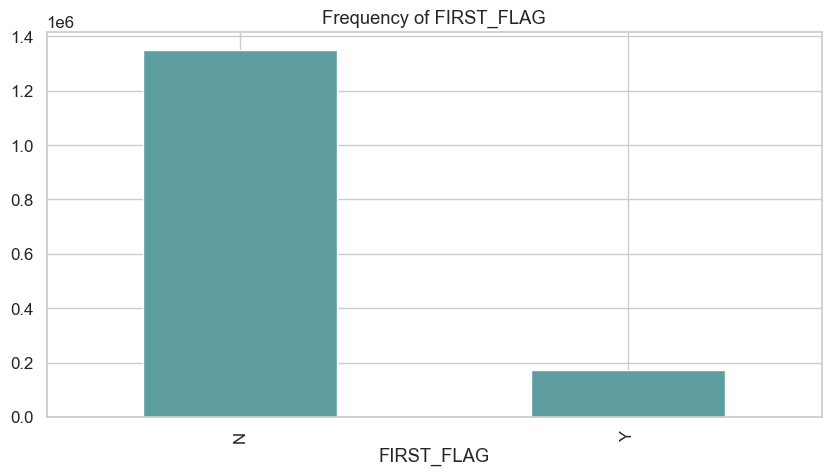

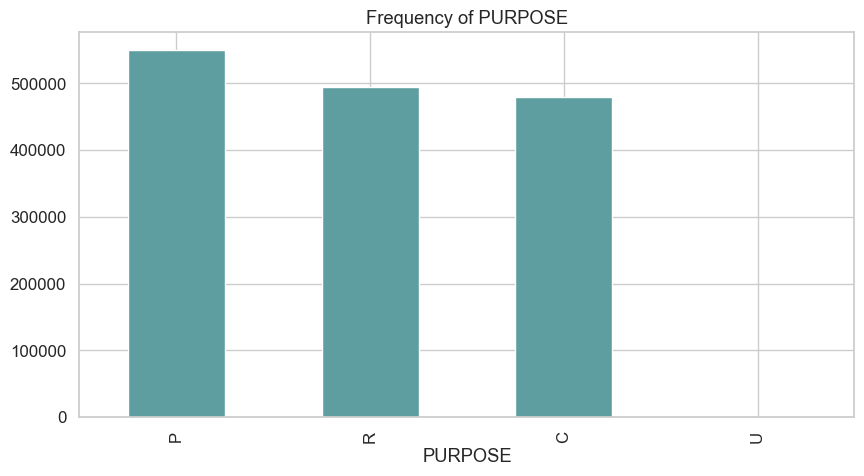

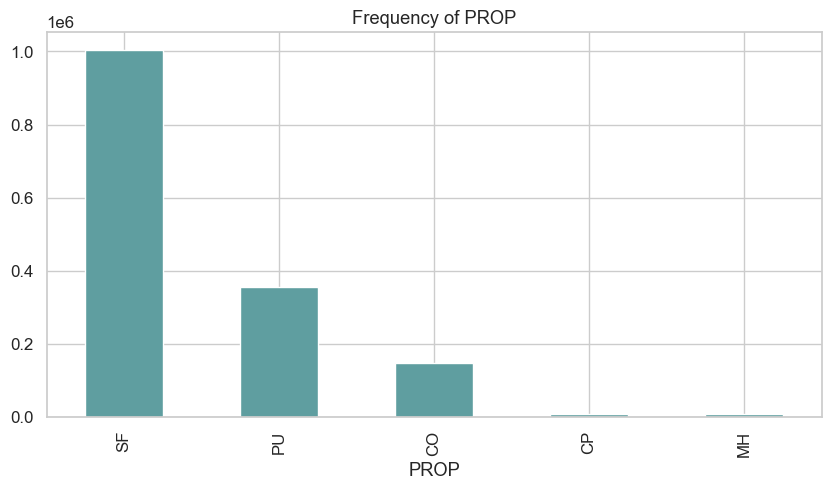

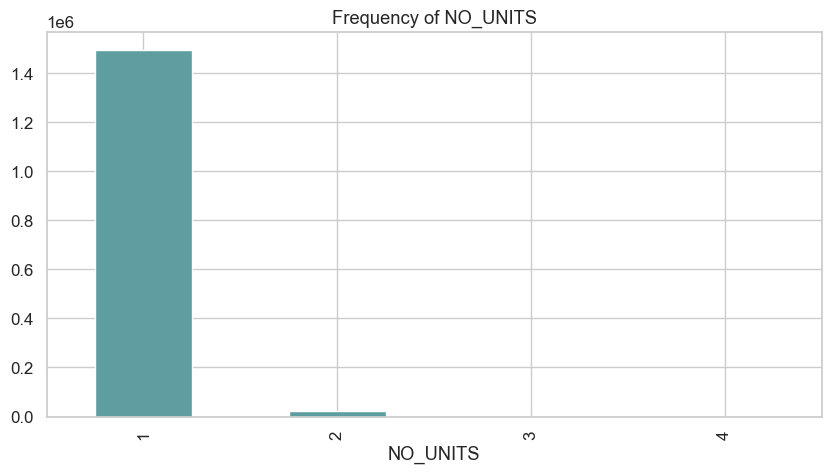

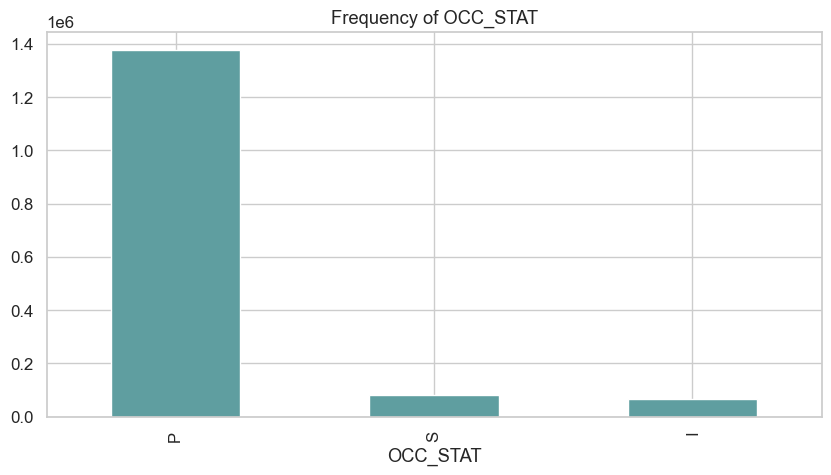

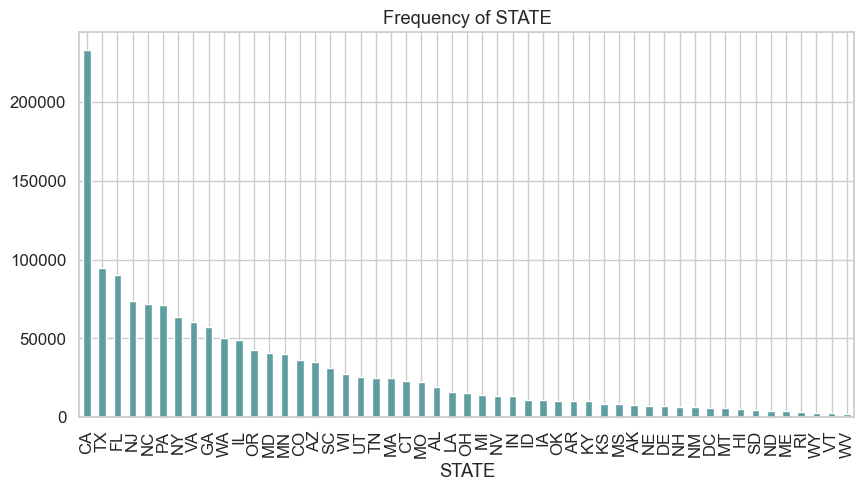

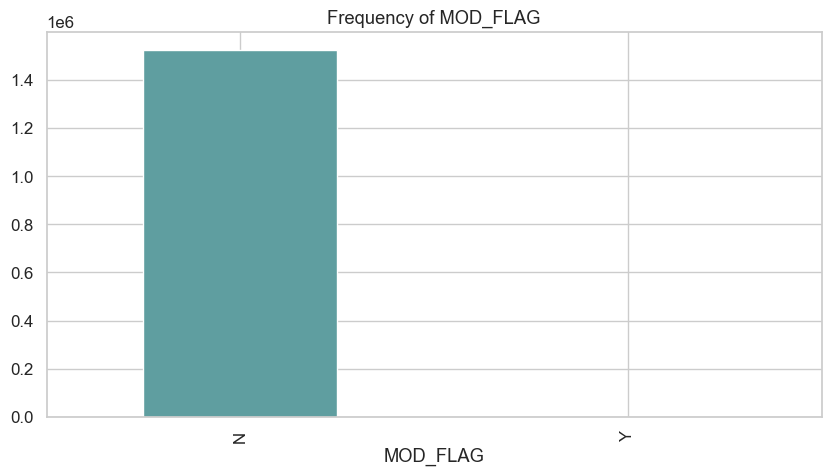

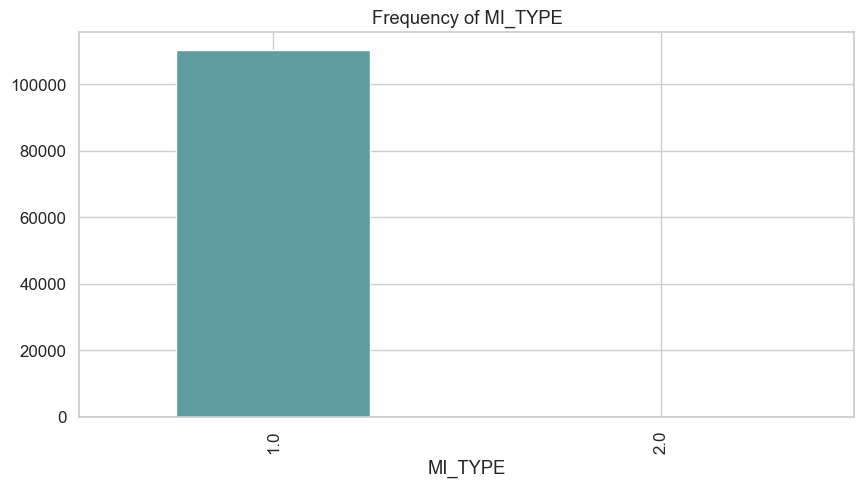

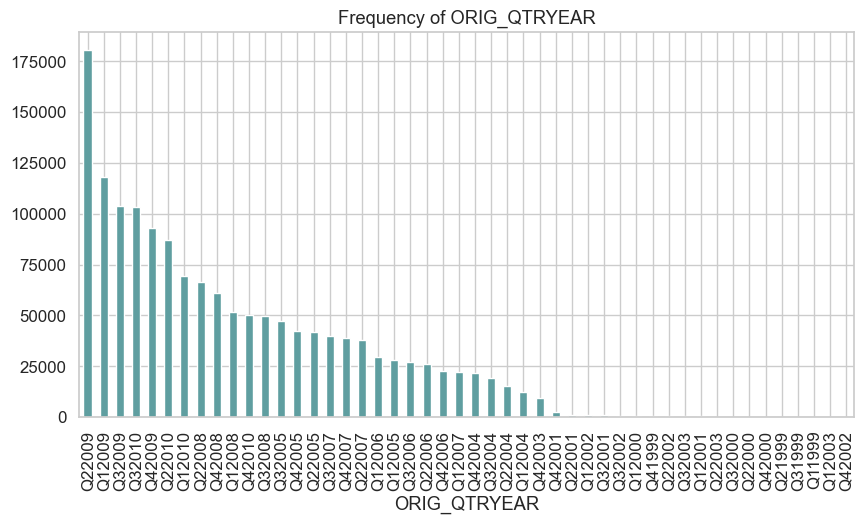

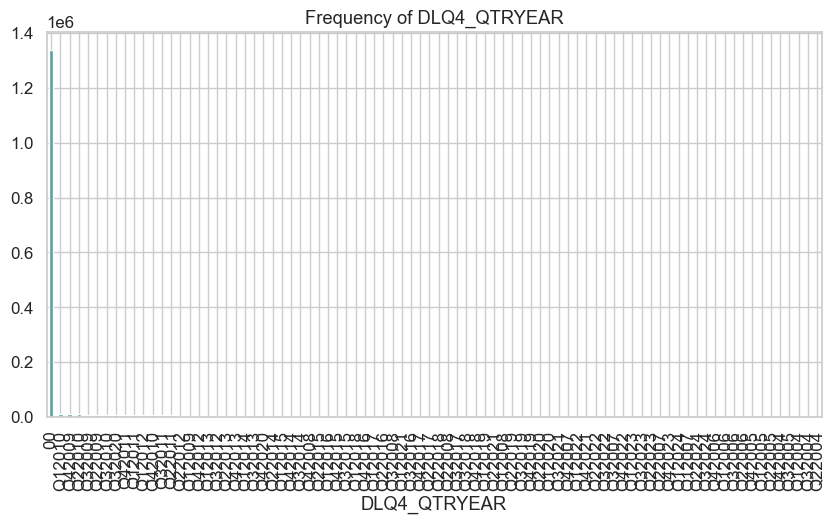

In [347]:
#Univariate analysis for categorical vars
for col in ['CHANNEL','NUM_BO','FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS',
       'OCC_STAT', 'STATE','MOD_FLAG','MI_TYPE',
       'ORIG_QTRYEAR']:
    plt.figure(figsize=(10,5))
    df_main_new[col].value_counts().plot(kind='bar',color='#5F9EA0')
    plt.title(f'Frequency of {col}')
    plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv1/EDA1_{col}.png",dpi=300,bbox_inches="tight")
    plt.show()

# 🪜 Feature Binning

In [349]:
def cscore_bands(score):
    if pd.isna(score): return 'Missing'
    elif score<600: return 'Poor'
    elif score<660: return 'Subprime'
    elif score<720: return 'Prime'
    else: return 'Excellent'

In [350]:
df_main_new['CUST_BAND']=df_main_new['CSCORE_B'].apply(cscore_bands)

In [351]:
def rate_bands(rate):
    if pd.isna(rate): return 'Missing'
    elif rate<3.5: return '<3.5'
    elif rate<4.5: return '3.5-4.5'
    elif rate<5.5: return '4.5-5.5'
    elif rate<6.5: return '5.5-6.5'
    elif rate<7.5: return '6.5-7.5'
    else: return '>7.5'    

In [352]:
df_main_new['RATE_BAND']=df_main_new['ORIG_RATE'].apply(rate_bands)

In [353]:
def term_band(term):
    if pd.isna(term): return 'Missing'
    elif term<100: return '<100'
    elif term<200: return '100-200'
    elif term<300: return '200-300'
    elif term<400: return '300-400'
    else: return '>400'

In [354]:
df_main_new['TERM_BAND']=df_main_new['ORIG_TERM'].apply(term_band)

In [355]:
def oltv_band(oltv):
    if pd.isna(oltv): return 'Missing'
    elif oltv<60: return '<60%'
    elif oltv<70: return '60-70%'    
    elif oltv<80: return '70-80%'
    elif oltv<90: return '80-90%'
    else: return '>90%'

In [356]:
df_main_new['OLTV_BAND']=df_main_new['OLTV'].apply(oltv_band)

In [357]:
def dti_band(dti):
    if pd.isna(dti): return 'Missing'
    elif dti<20: return '<20%'
    elif dti<30: return '20-30%'
    elif dti<40: return '30-40%'
    elif dti<50: return '40-50%'
    else: return '>50%'    

In [358]:
df_main_new['DTI_BAND']=df_main_new['DTI'].apply(dti_band)

# 📊 EDA on Continuous Variables

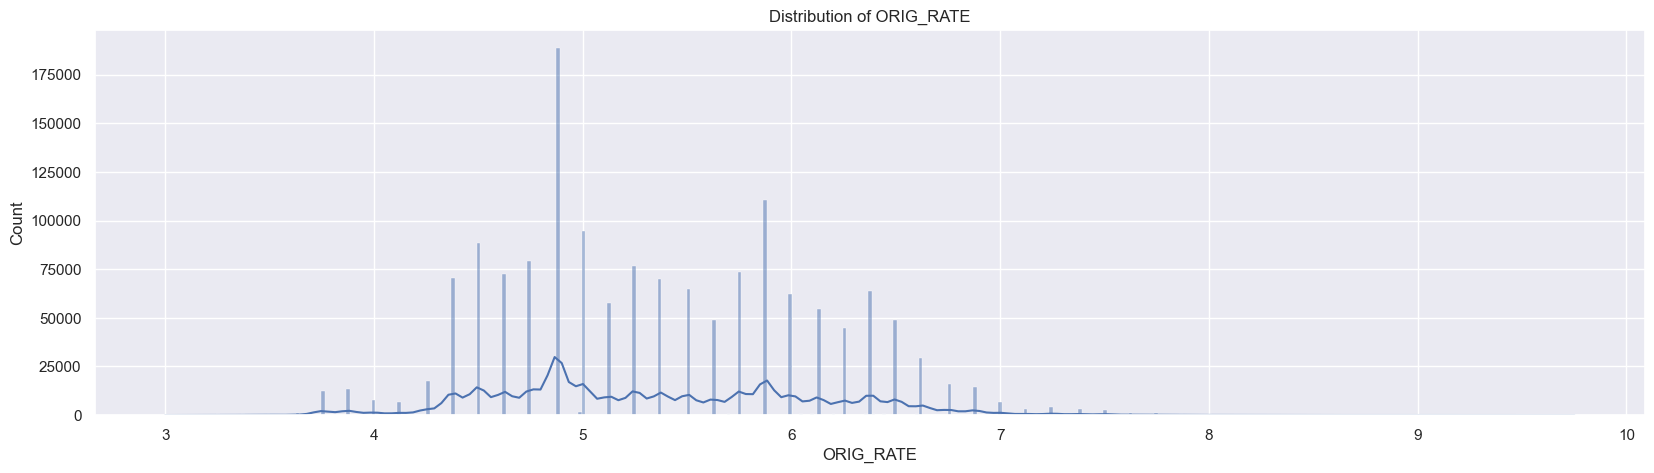

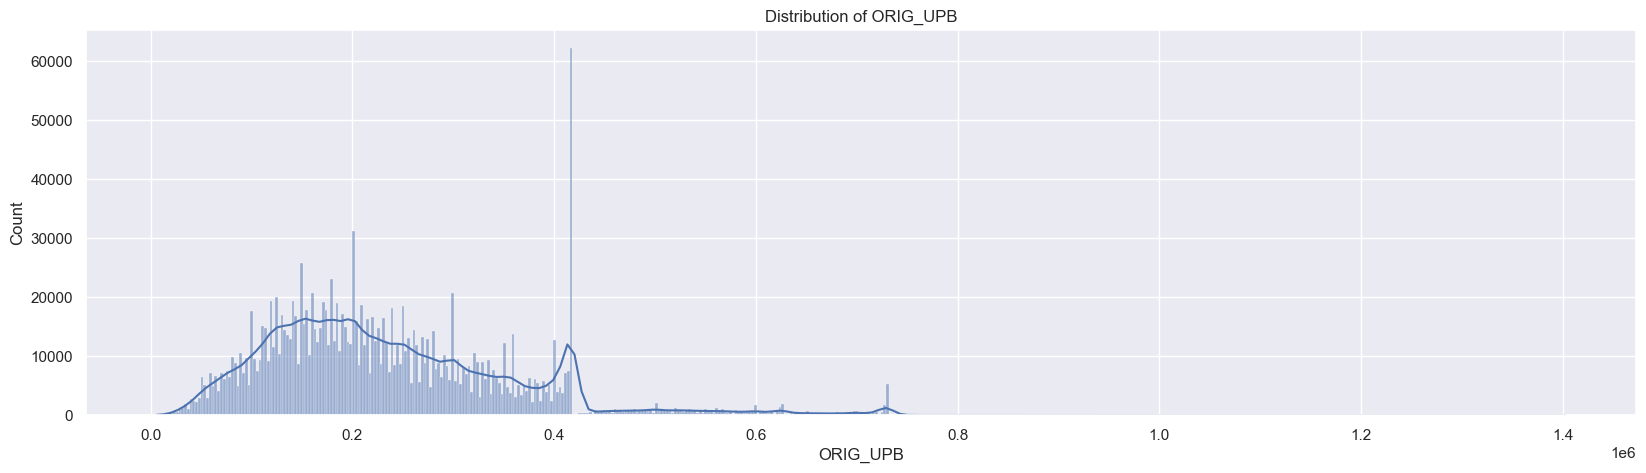

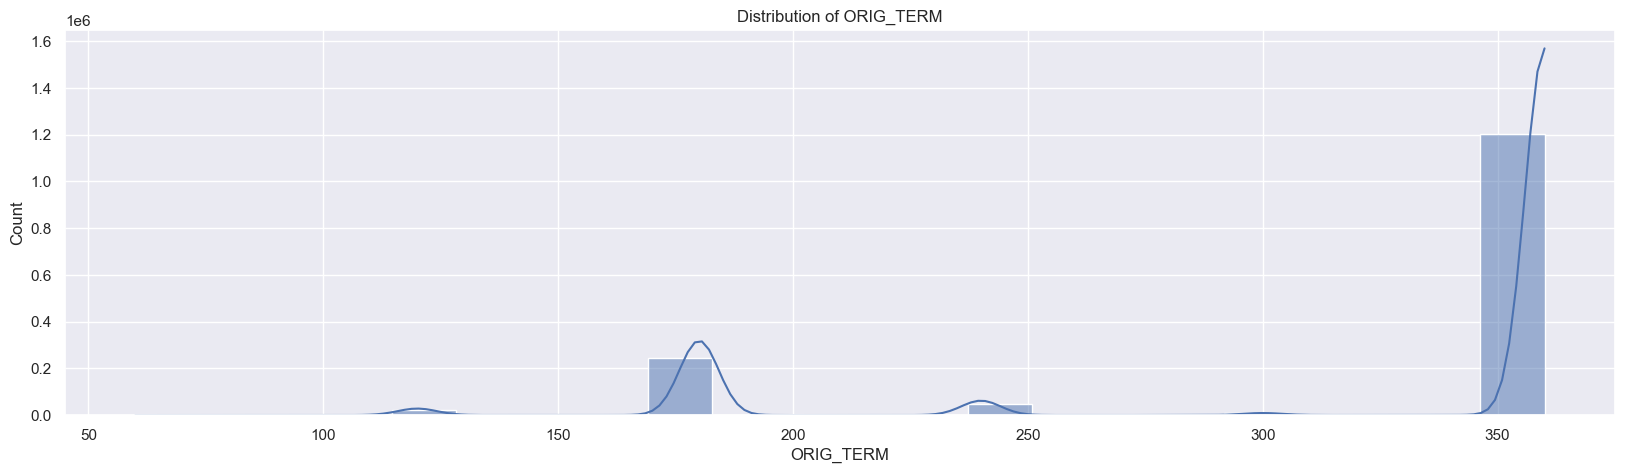

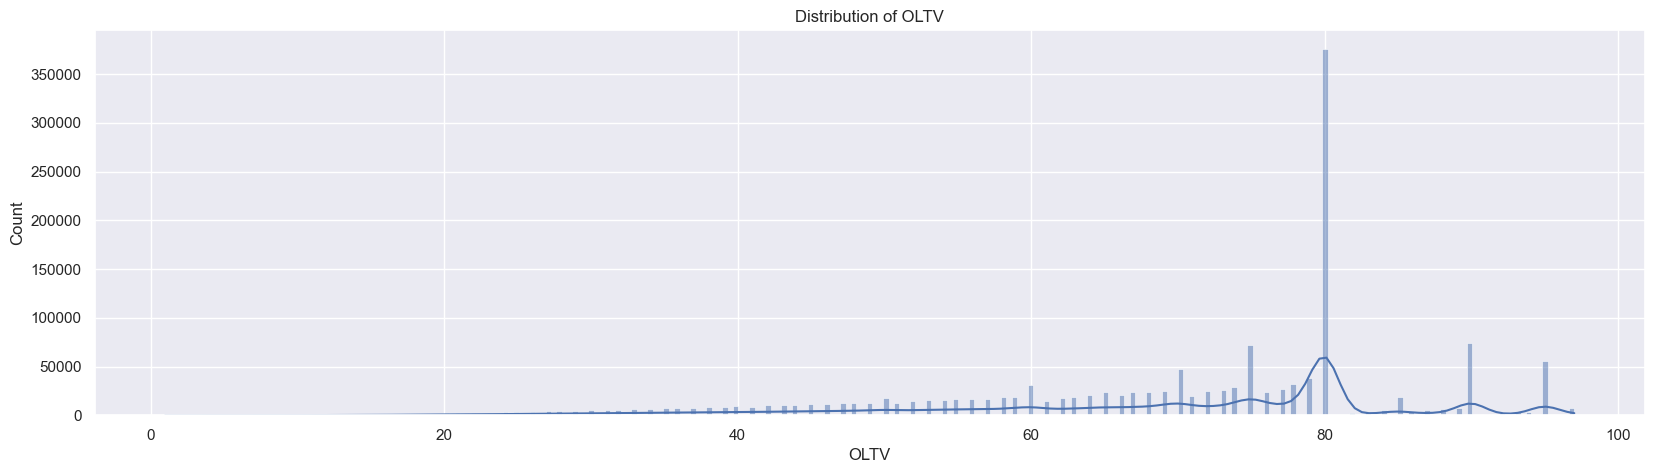

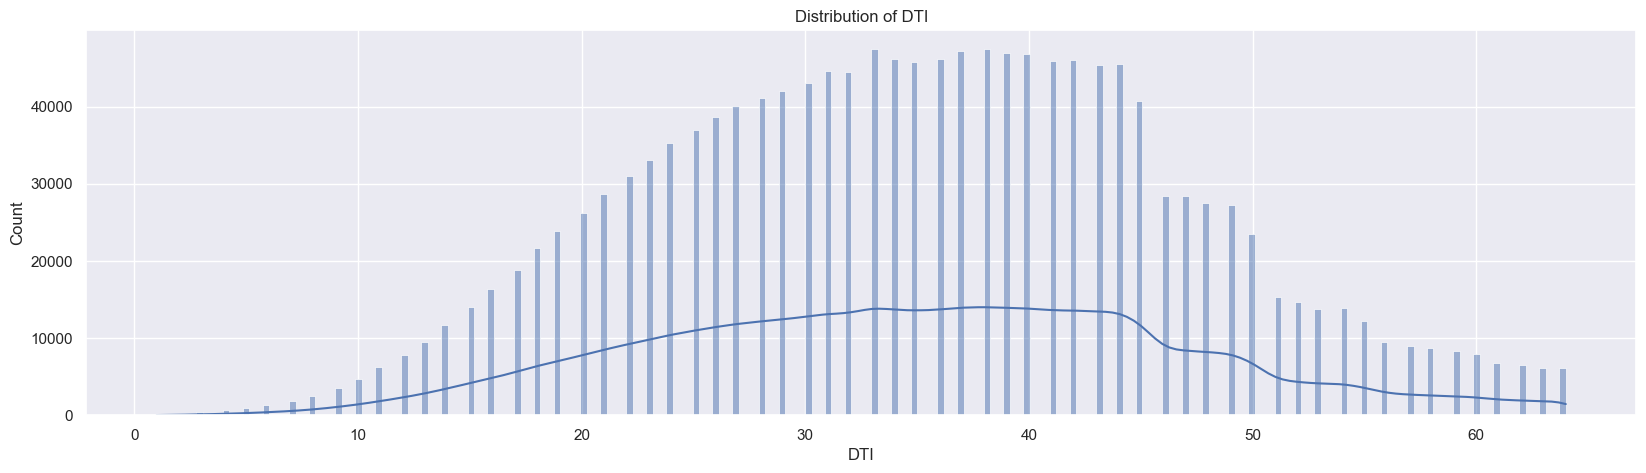

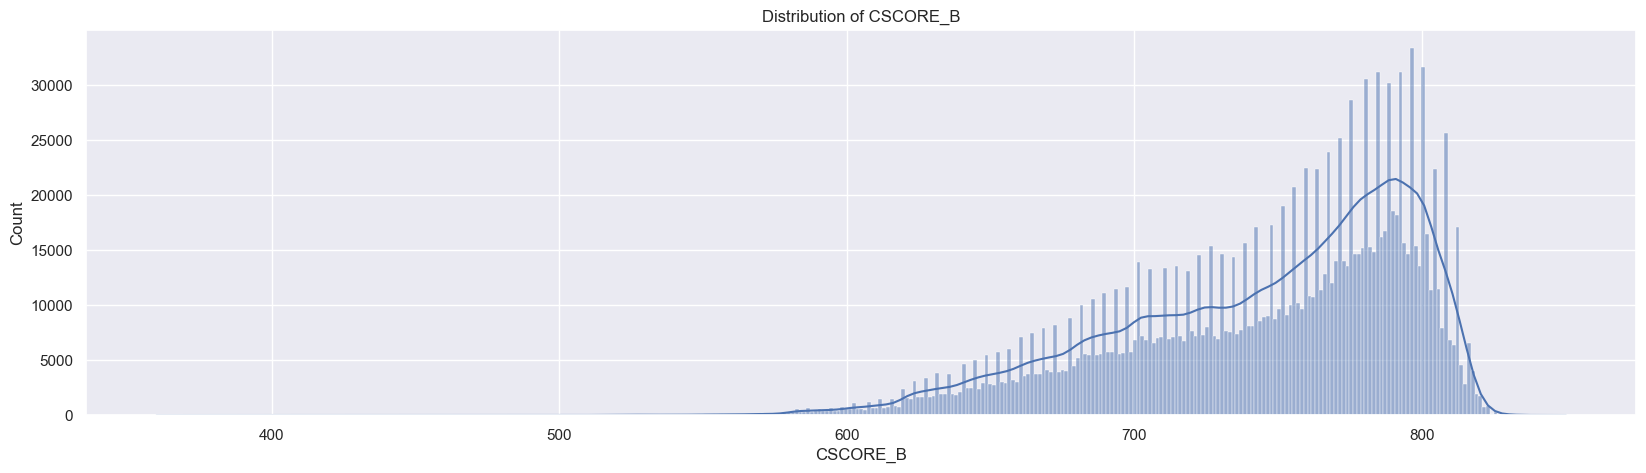

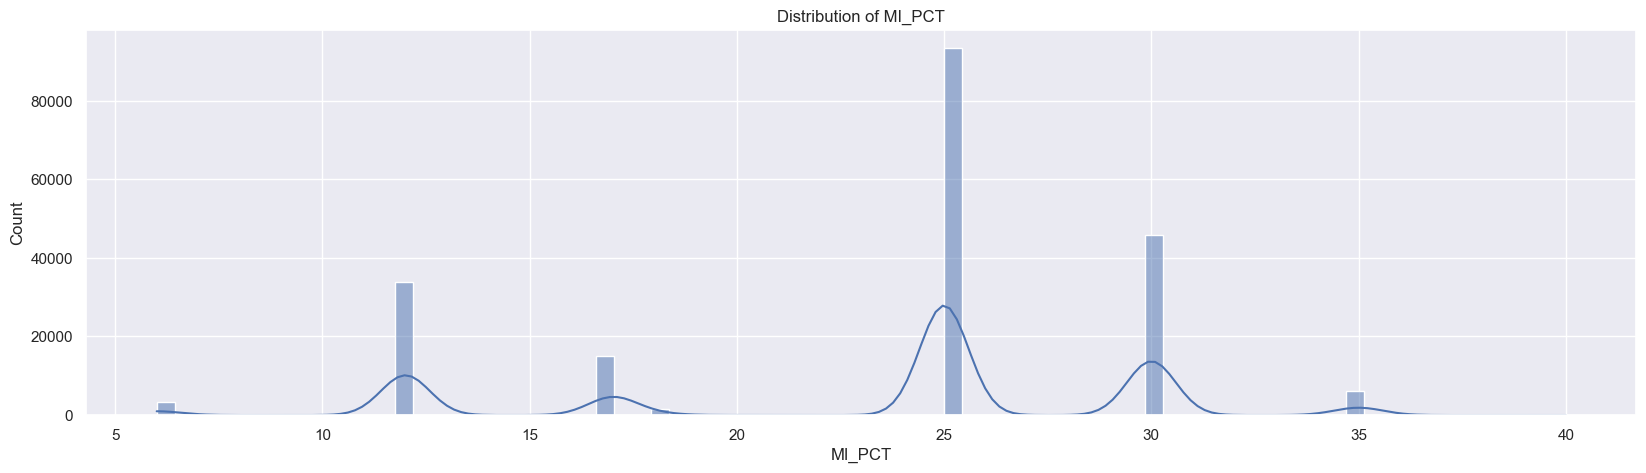

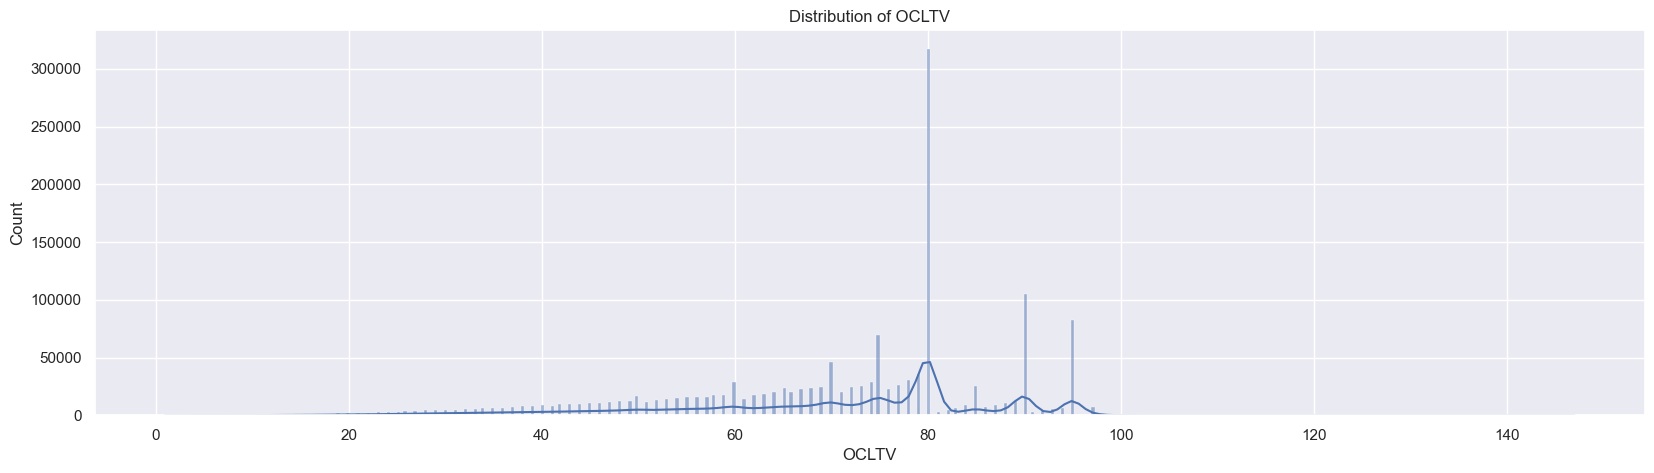

In [386]:
#Univariate analysis for continuous vars
for col in ['ORIG_RATE', 'ORIG_UPB', 'ORIG_TERM', 'OLTV','DTI', 'CSCORE_B','MI_PCT','OCLTV']:
    plt.figure(figsize=(20,5))
    sns.histplot(df_main_new[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"ghub/my-portfolio/assets/images/eda_cont_lv1/cont_eda_{col}.png",dpi=300,bbox_inches="tight")
    plt.show()

# 📦 Boxplots for Continuous Variables

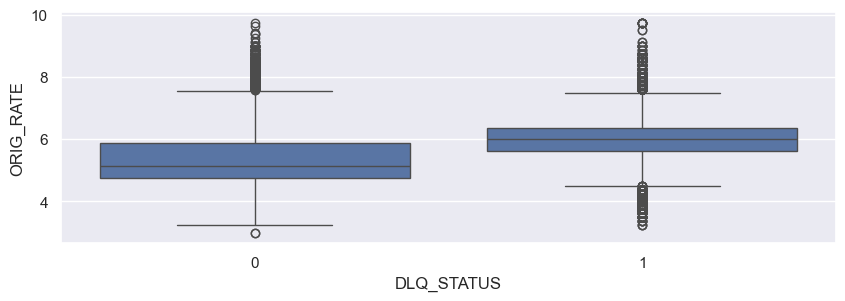

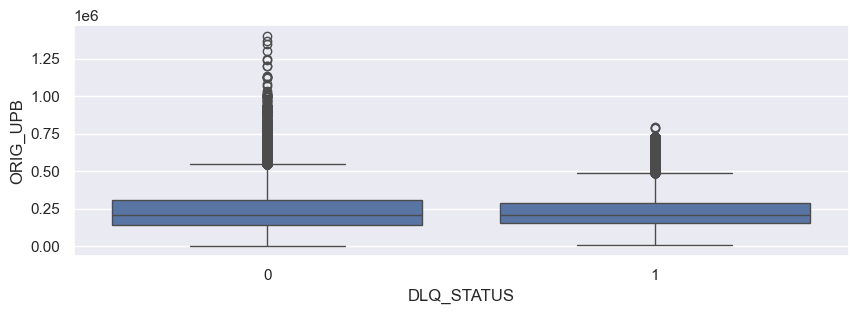

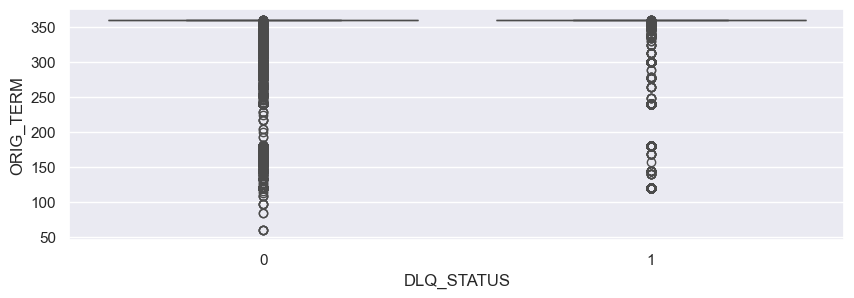

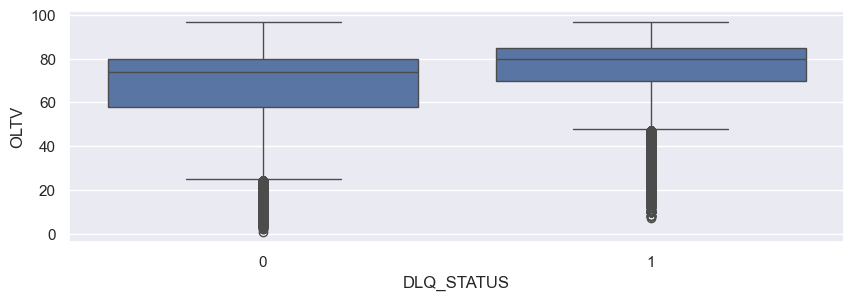

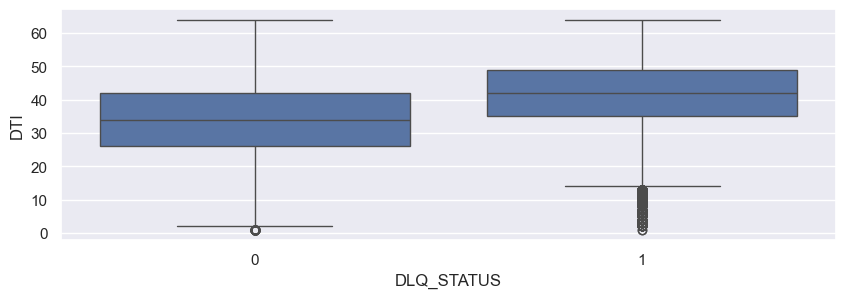

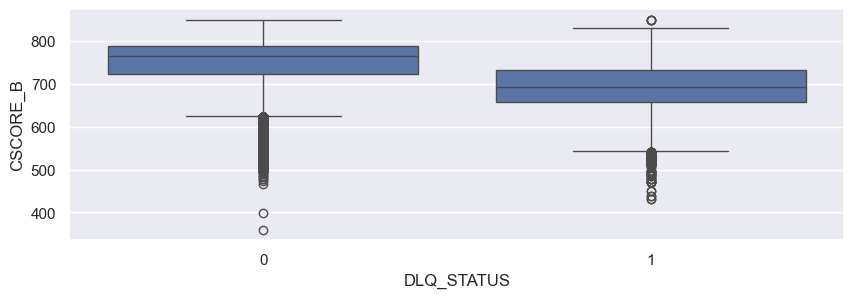

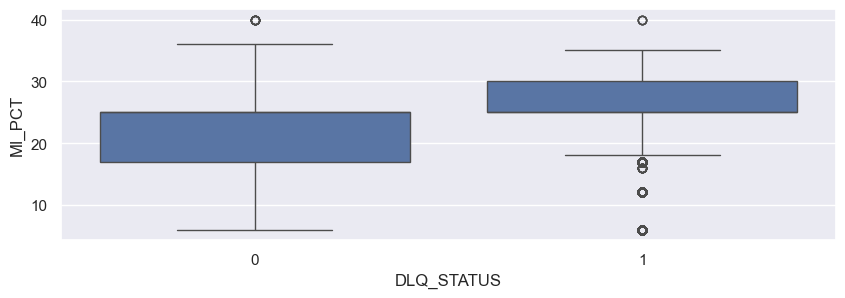

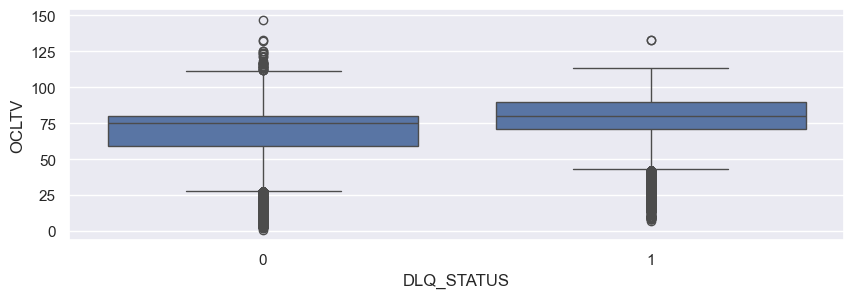

In [113]:
# Boxplot for continous vars
#data_box=pd.concat([x,y],axis=1)
data_box=df_main_new.copy()
for col in ['ORIG_RATE', 'ORIG_UPB', 'ORIG_TERM', 'OLTV','DTI', 'CSCORE_B','MI_PCT','OCLTV']:
    plt.figure(figsize=(10,3))
    sns.boxplot(x='DLQ_STATUS',y=col,data=data_box)
    plt.show()

# 📊 Level 2 EDA on Categorical Variables- By Origination & Default

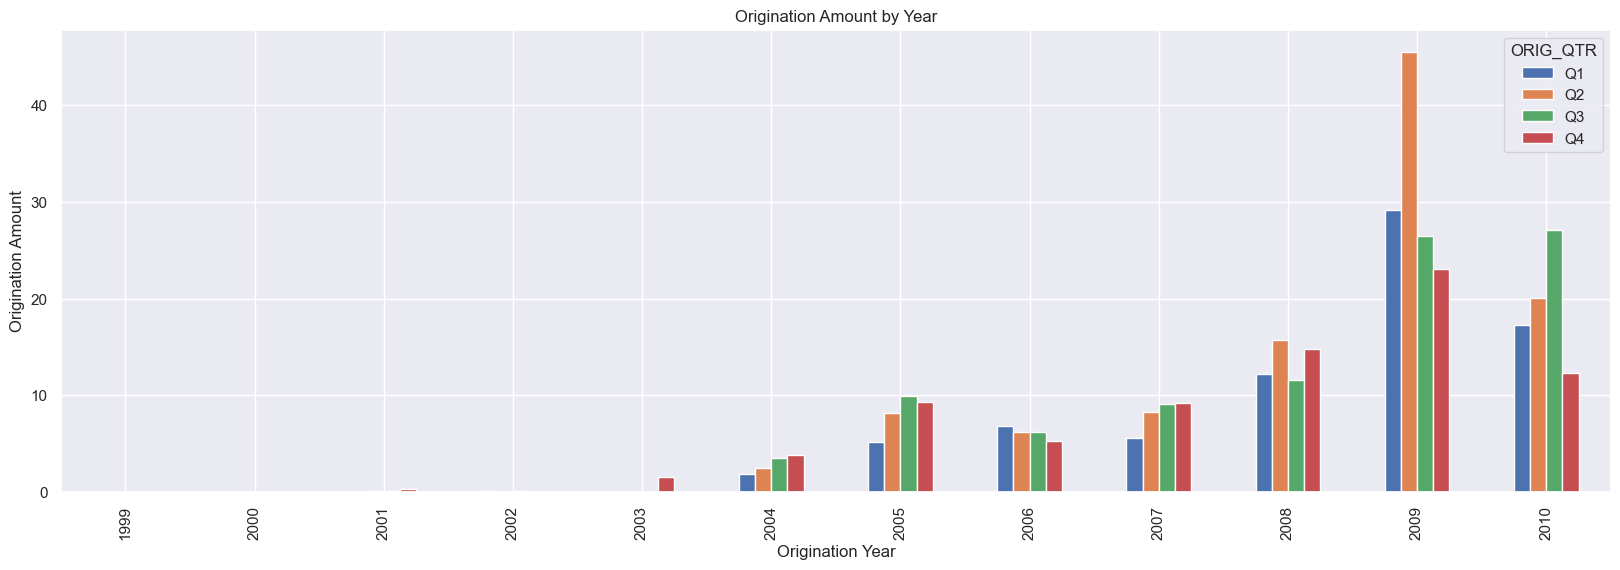

In [360]:
df_temp_new=df_main_new.copy()
df_temp_new=df_temp_new.sort_values(by=['ORIG_YEAR','ORIG_QTR'])
df_temp=df_temp_new.groupby(['ORIG_YEAR','ORIG_QTR'])['ORIG_UPB'].aggregate(['sum'])
df_temp.reset_index(inplace=True)

df_temp['sum']=df_temp['sum']/1000000000
sns.set(style='darkgrid')
df_temp_pivot=df_temp.pivot(index='ORIG_YEAR',columns='ORIG_QTR',values='sum')
df_temp_pivot.plot(kind='bar',figsize=(20,6))
plt.xlabel('Origination Year')
plt.ylabel('Origination Amount')
plt.title('Origination Amount by Year')
plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/orig_amt.png",dpi=300,bbox_inches="tight")

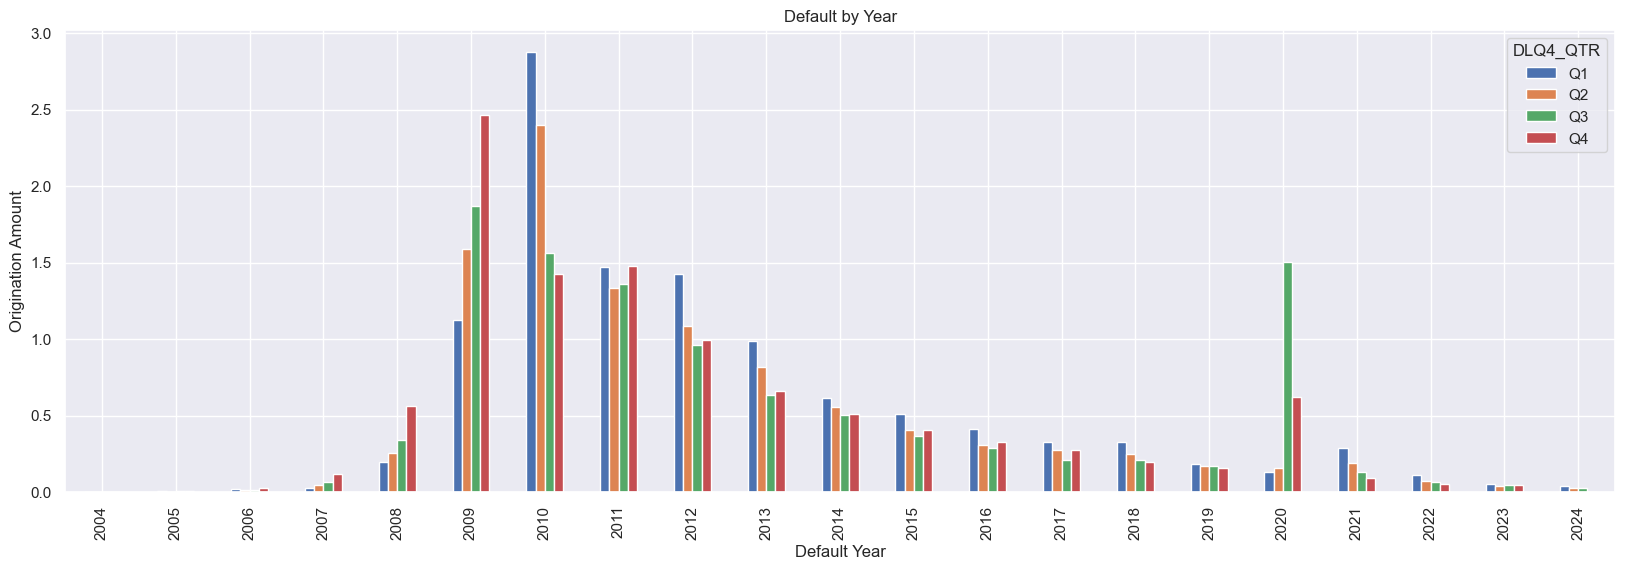

In [372]:
df_temp_new=df_main_new[df_main_new['DLQ_STATUS']==1]
df_temp=df_temp_new.groupby(['DLQ4_YEAR','DLQ4_QTR'])['ORIG_UPB'].aggregate(['sum'])
df_temp.reset_index(inplace=True)

df_temp['sum']=df_temp['sum']/1000000000
sns.set(style='darkgrid')
df_temp_pivot=df_temp.pivot(index='DLQ4_YEAR',columns='DLQ4_QTR',values='sum')
df_temp_pivot.plot(kind='bar',figsize=(20,6))
plt.xlabel('Default Year')
plt.ylabel('Origination Amount')
plt.title('Default by Year')
plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/def_amt.png",dpi=300,bbox_inches="tight")

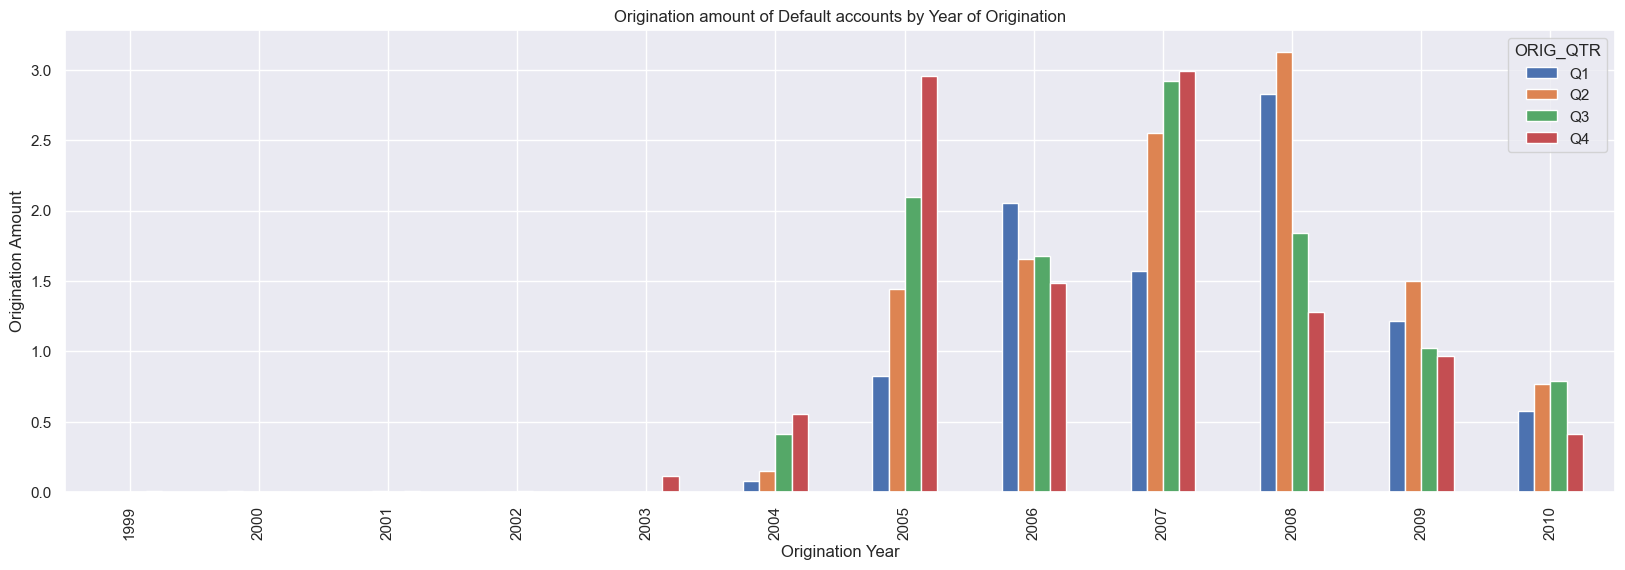

In [374]:
df_temp_new=df_main_new[df_main_new['DLQ_STATUS']==1]
df_temp=df_temp_new.groupby(['ORIG_YEAR','ORIG_QTR'])['ORIG_UPB'].aggregate(['sum'])
df_temp.reset_index(inplace=True)

df_temp['sum']=df_temp['sum']/1000000000
sns.set(style='darkgrid')
df_temp_pivot=df_temp.pivot(index='ORIG_YEAR',columns='ORIG_QTR',values='sum')
df_temp_pivot.plot(kind='bar',figsize=(20,6))
plt.xlabel('Origination Year')
plt.ylabel('Origination Amount')
plt.title('Origination amount of Default accounts by Year of Origination')
plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/def__by_orig_amt.png",dpi=300,bbox_inches="tight")

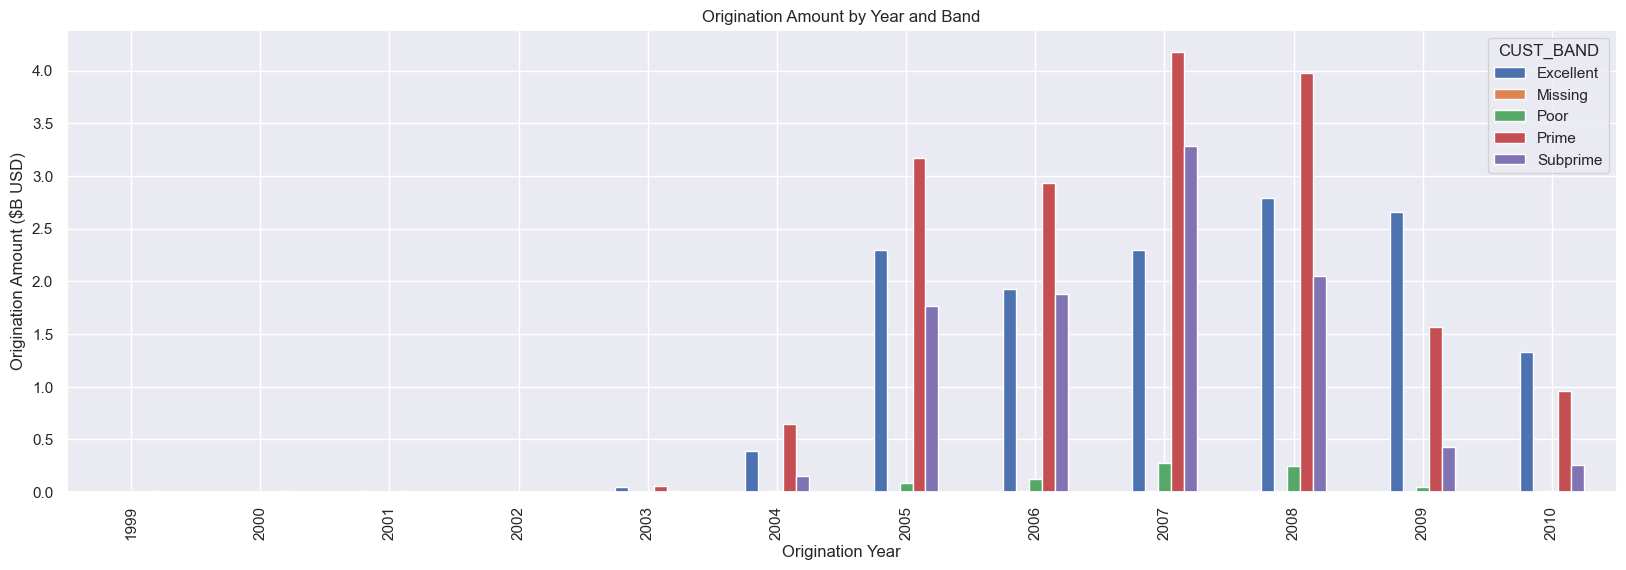

In [376]:
#df_temp_new=df_main_new[df_main_new['CUST_BAND']!='Excellent']
df_temp=df_temp_new.groupby(['ORIG_YEAR','CUST_BAND'])['ORIG_UPB'].aggregate(['sum'])
df_temp.reset_index(inplace=True)

df_temp['sum']=df_temp['sum']/1000000000
sns.set(style='darkgrid')
df_temp_pivot=df_temp.pivot(index='ORIG_YEAR',columns='CUST_BAND',values='sum')
df_temp_pivot.plot(kind='bar',figsize=(20,6))
plt.xlabel('Origination Year')
plt.ylabel('Origination Amount ($B USD)')
plt.title('Origination Amount by Year and Band')
plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/cust_band_orig.png",dpi=300,bbox_inches="tight")

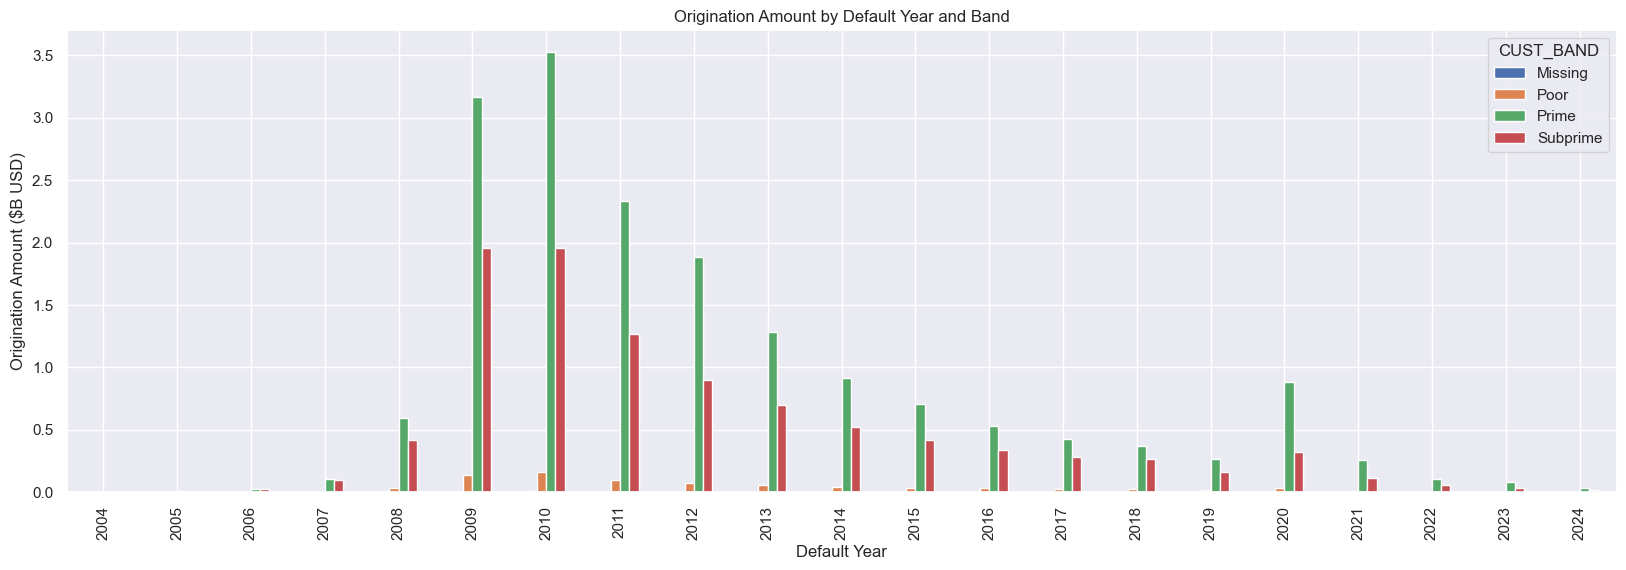

In [378]:
df_temp_new=df_main_new[df_main_new['CUST_BAND']!='Excellent']  #Removing since it skews the plot
df_temp_new=df_temp_new[df_temp_new['DLQ_STATUS']==1]
df_temp=df_temp_new.groupby(['DLQ4_YEAR','CUST_BAND'])['ORIG_UPB'].aggregate(['sum'])
df_temp.reset_index(inplace=True)

df_temp['sum']=df_temp['sum']/1000000000
sns.set(style='darkgrid')
df_temp_pivot=df_temp.pivot(index='DLQ4_YEAR',columns='CUST_BAND',values='sum')
df_temp_pivot.plot(kind='bar',figsize=(20,6))
plt.xlabel('Default Year')
plt.ylabel('Origination Amount ($B USD)')
plt.title('Origination Amount by Default Year and Band')
plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/cust_band_default.png",dpi=300,bbox_inches="tight")

In [380]:
def origination_cut(var):
    df_temp_new=df_main_new.copy()
    df_temp=df_temp_new.groupby(['ORIG_YEAR',var])['ORIG_UPB'].aggregate(['sum'])
    df_temp.reset_index(inplace=True)

    df_temp['sum']=df_temp['sum']/1000000000
    sns.set(style='darkgrid')
    df_temp_pivot=df_temp.pivot(index='ORIG_YEAR',columns=var,values='sum')
    df_temp_pivot.plot(kind='bar',figsize=(20,6))
    plt.xlabel('Origination Year')
    plt.ylabel('Origination Amount ($B USD)')
    plt.title(f'Origination Amount by Origination Year and {var}')
    plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/{var}_orig.png",dpi=300,bbox_inches="tight")
    plt.show()

In [382]:
def default_cut(var,switch): #switch=1 if only default accounts need to be analysed, otheriwse 0 for all accounts
    if switch==1:
        df_temp_new=df_main_new[df_main_new['DLQ_STATUS']==1]
    else:
        df_temp_new=df_main_new.copy()
    df_temp=df_temp_new.groupby(['DLQ4_YEAR',var])['ORIG_UPB'].aggregate(['sum'])
    df_temp.reset_index(inplace=True)

    df_temp['sum']=df_temp['sum']/1000000000
    sns.set(style='darkgrid')
    df_temp_pivot=df_temp.pivot(index='DLQ4_YEAR',columns=var,values='sum')
    df_temp_pivot.plot(kind='bar',figsize=(20,6))
    plt.xlabel('Default Year')
    plt.ylabel('Origination Amount ($B USD)')
    plt.title(f'Origination Amount by Default Year and {var}')
    plt.savefig(f"ghub/my-portfolio/assets/images/eda_cat_lv2/{var}_def.png",dpi=300,bbox_inches="tight")
    plt.show()

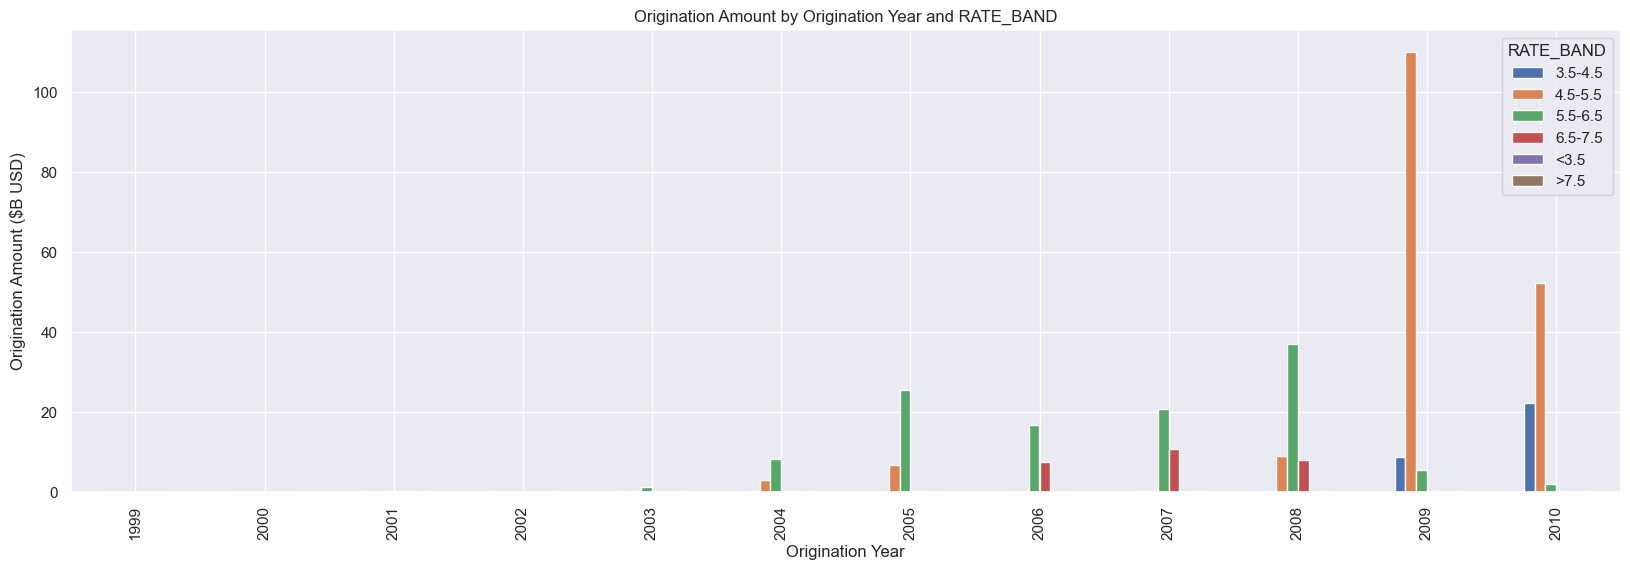

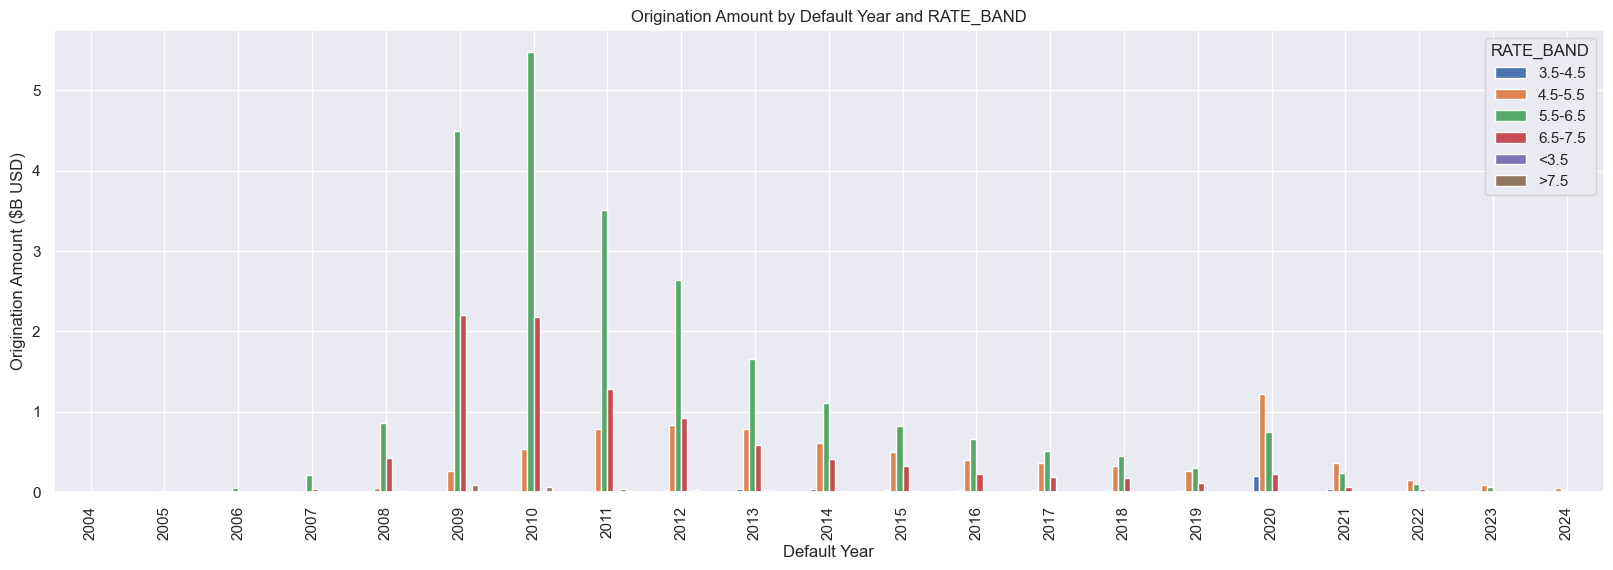

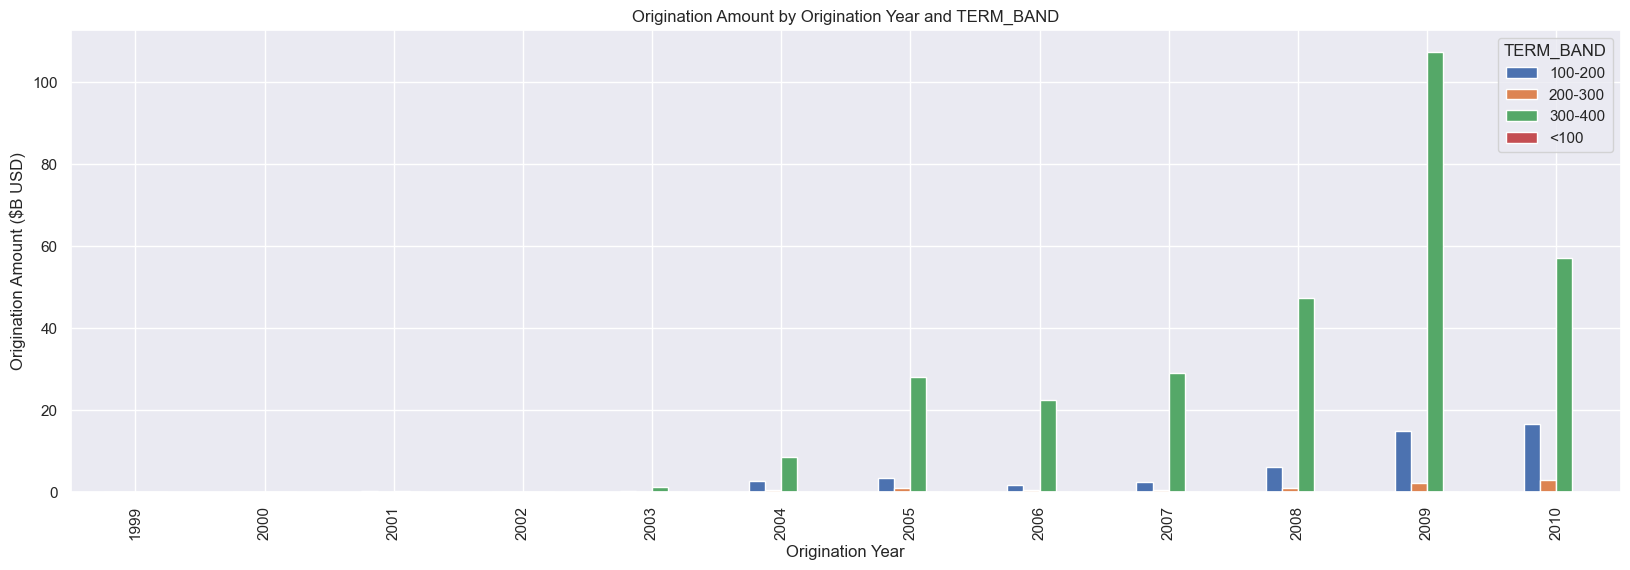

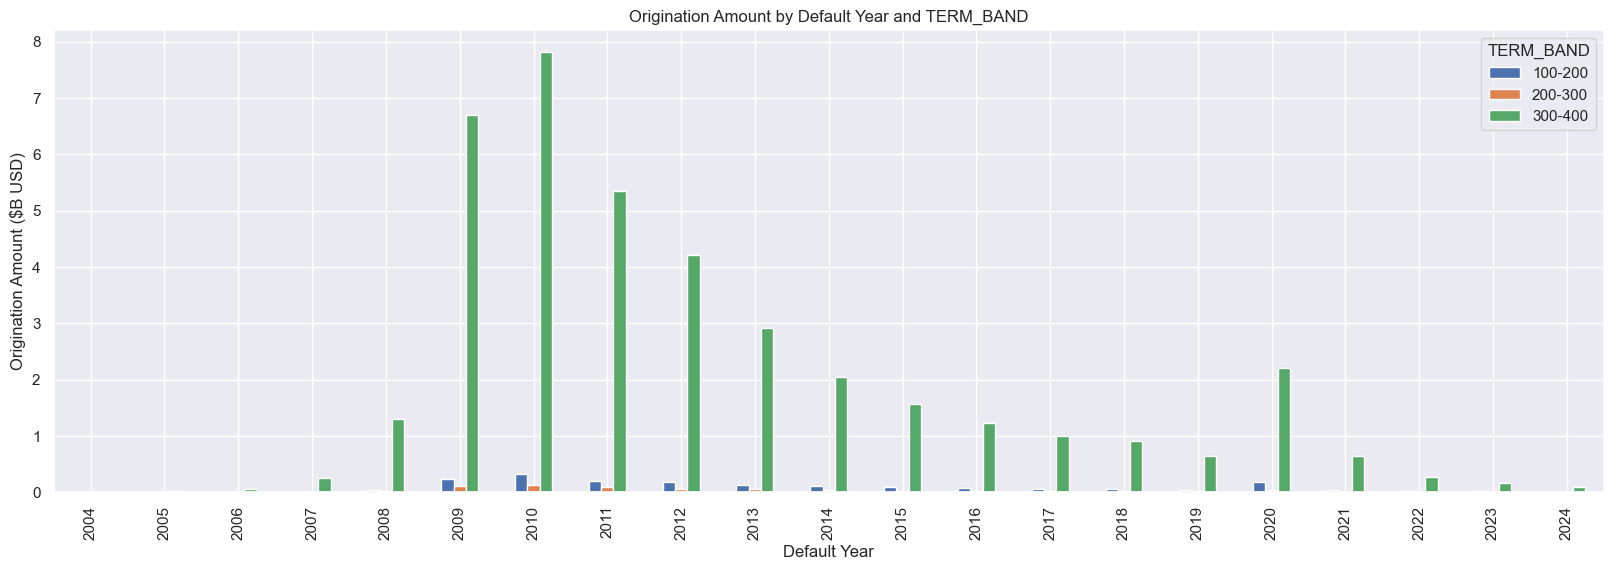

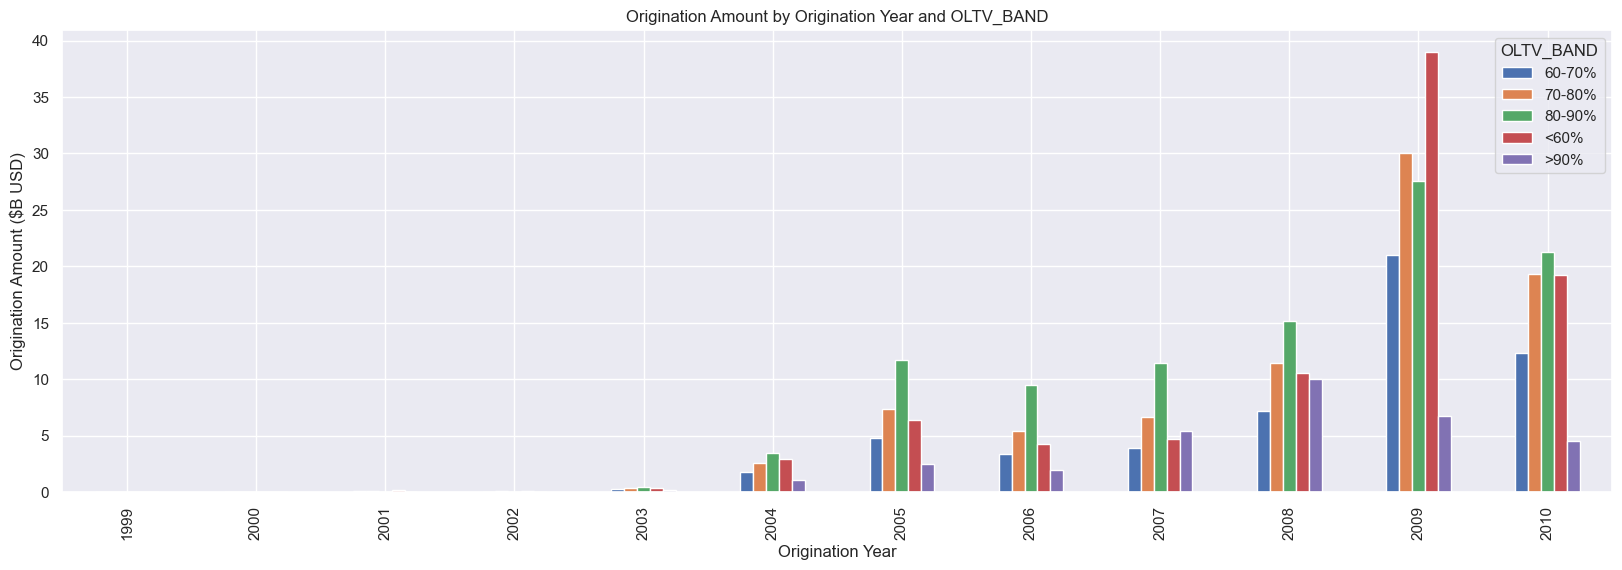

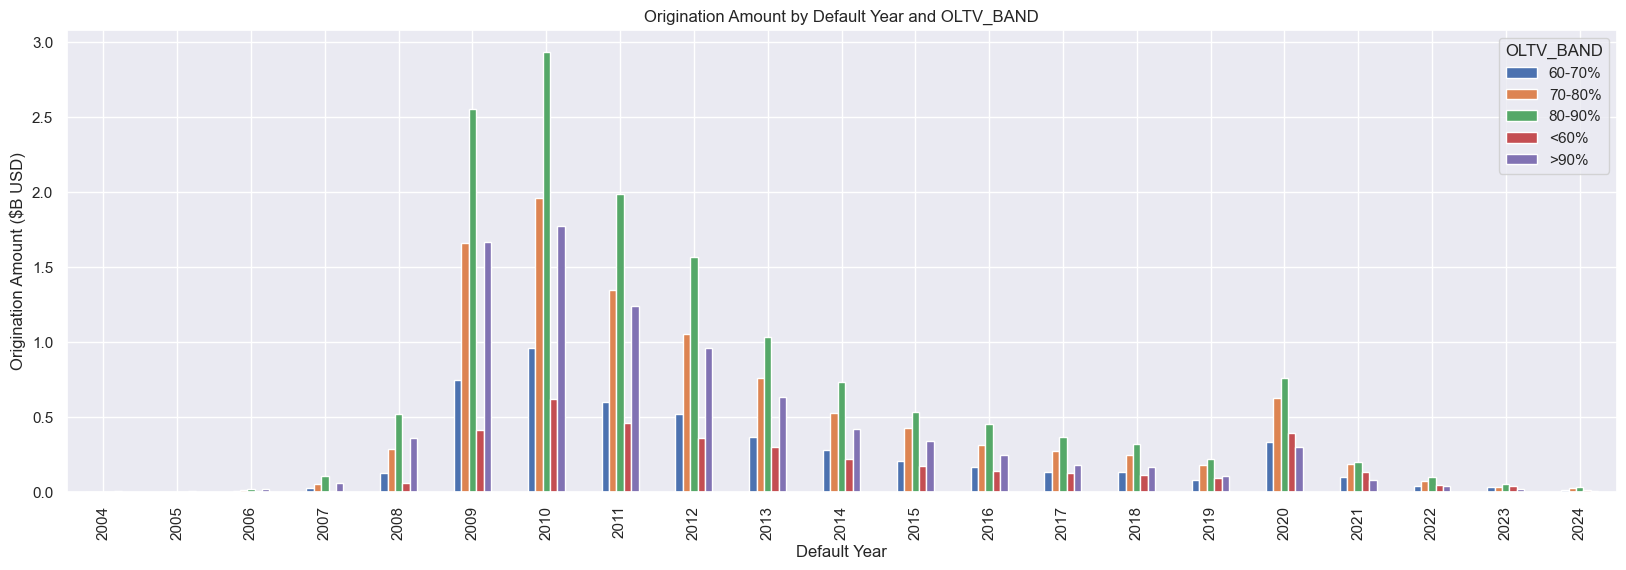

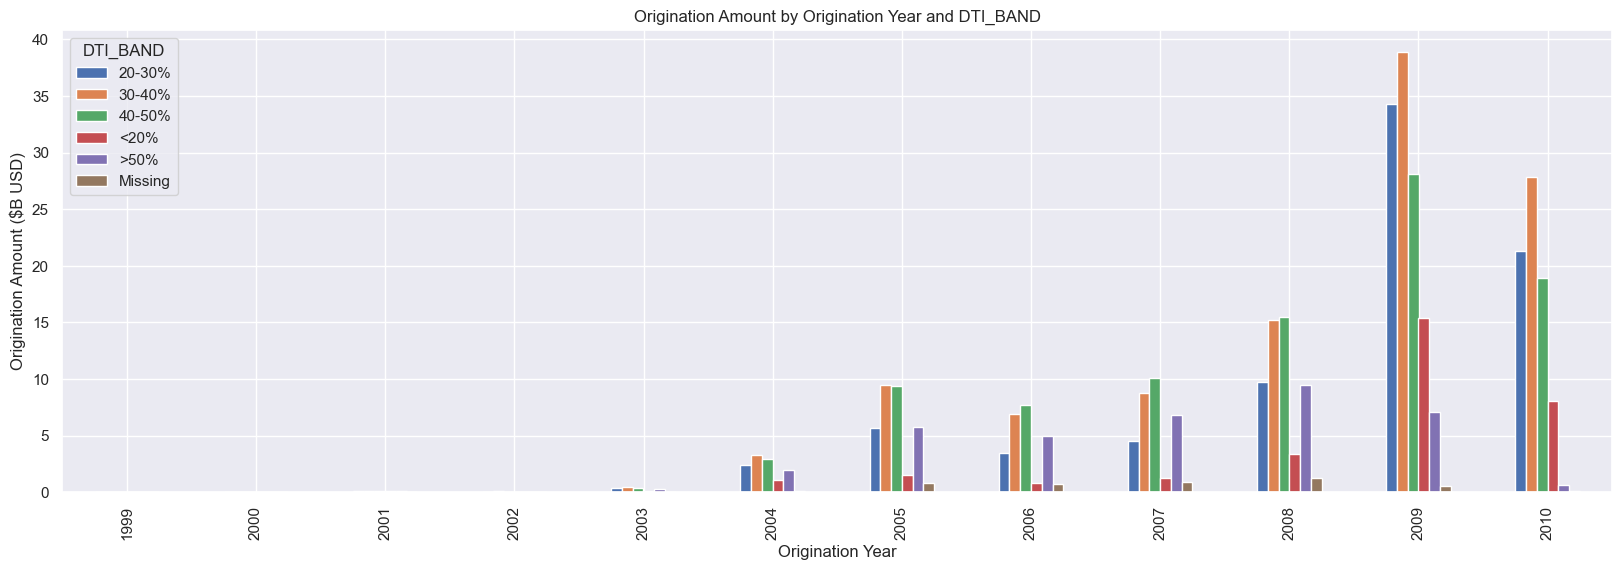

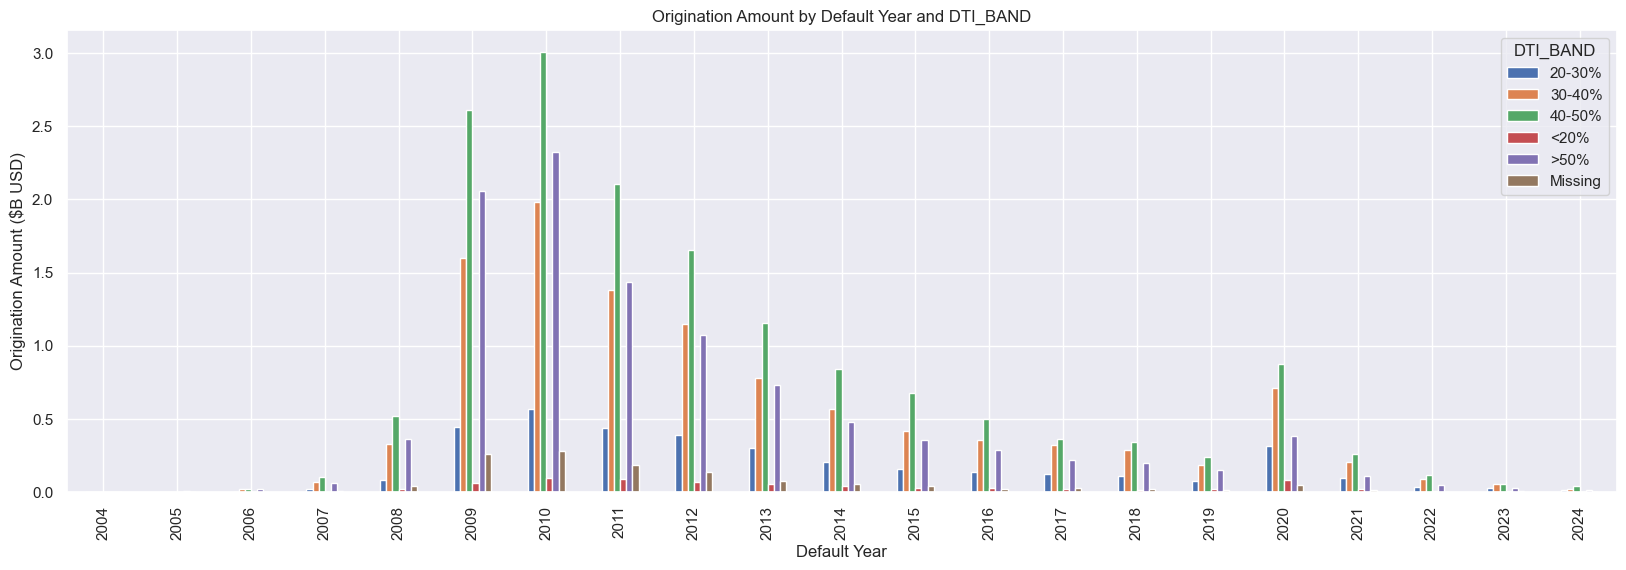

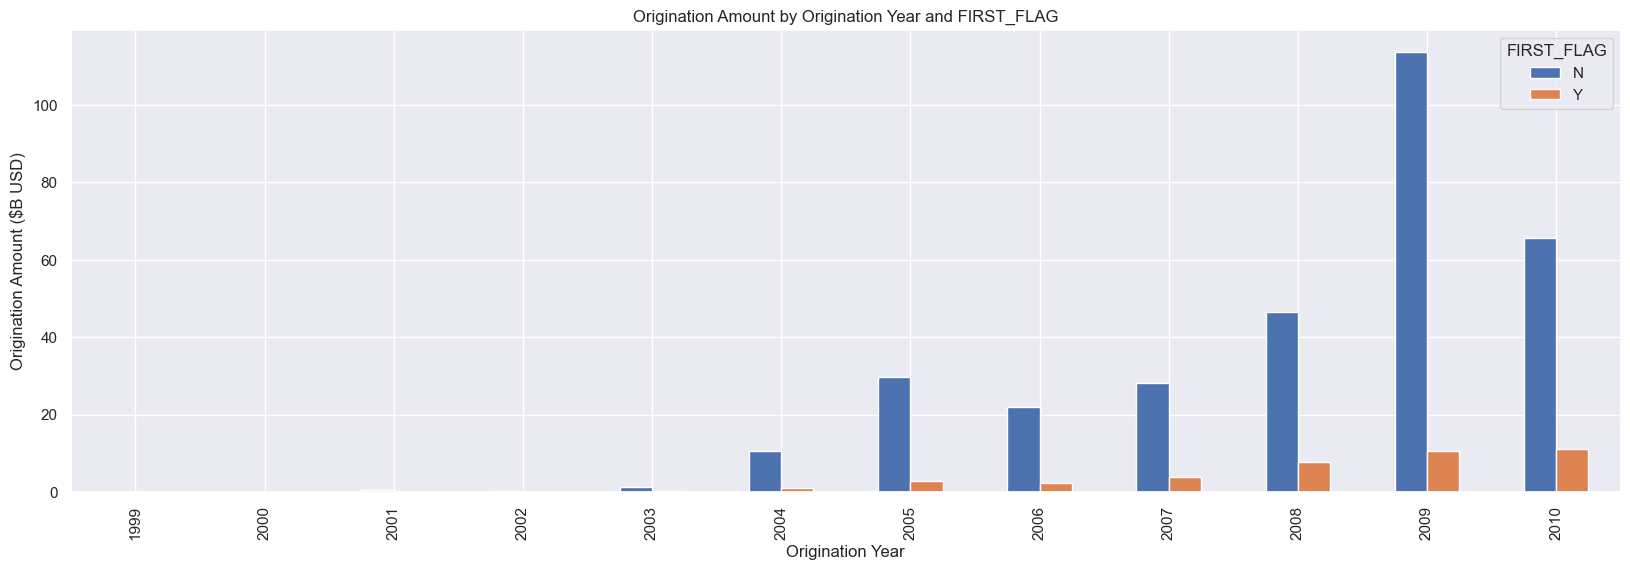

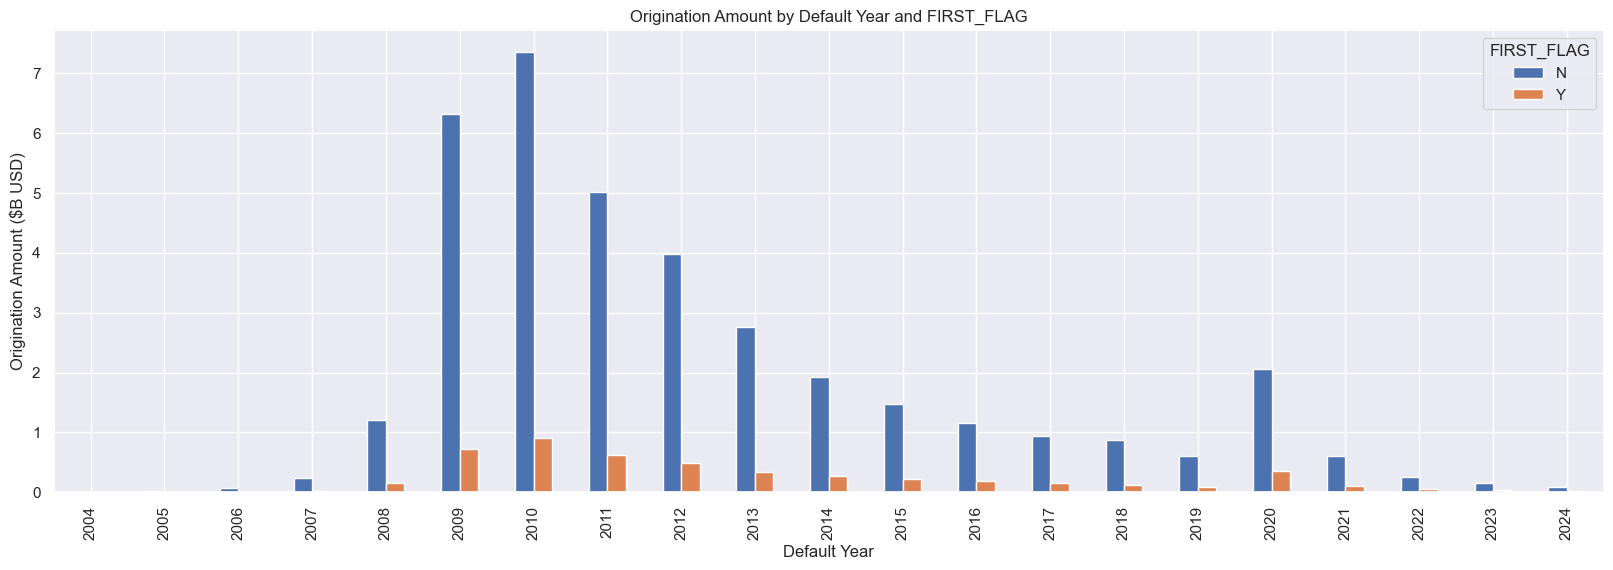

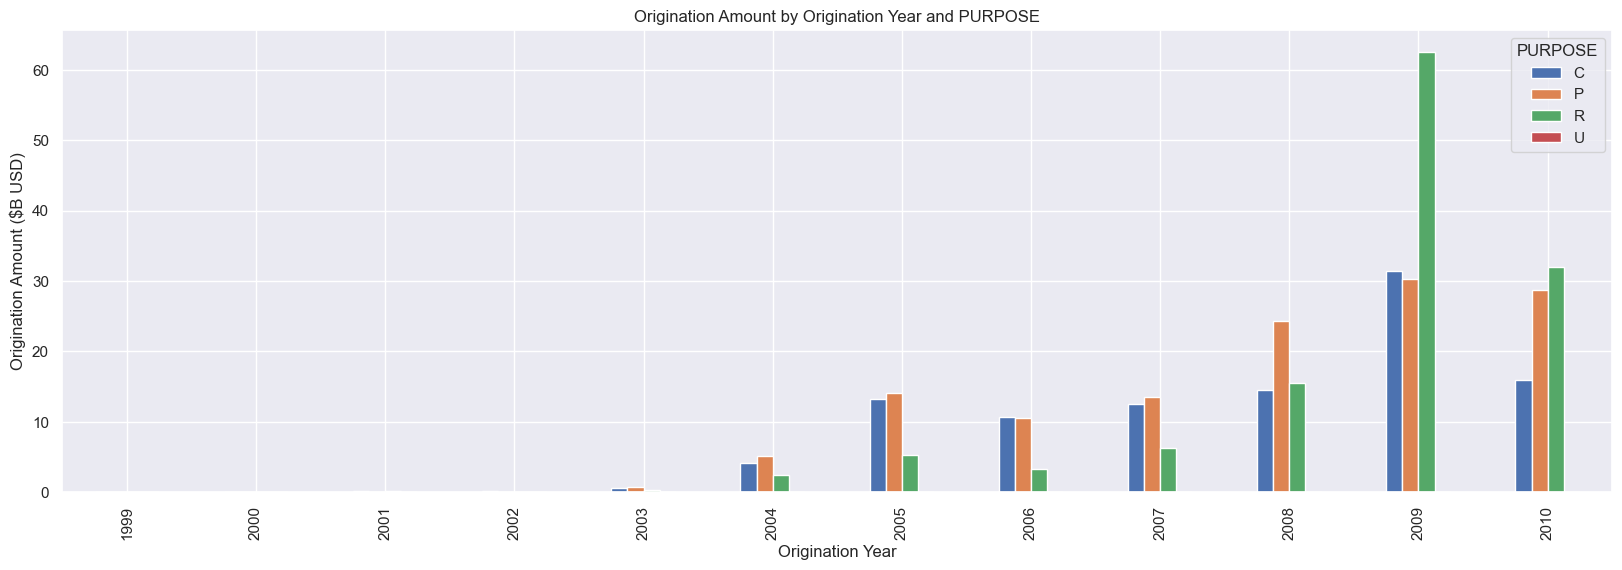

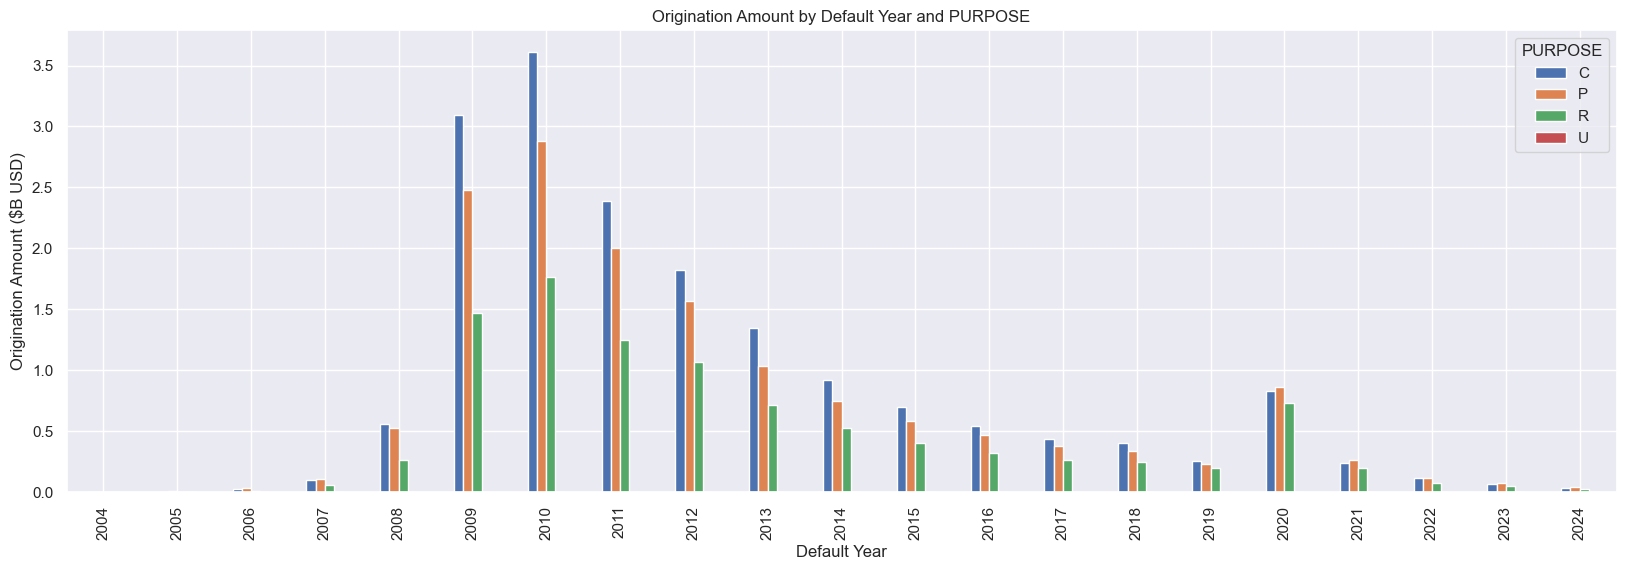

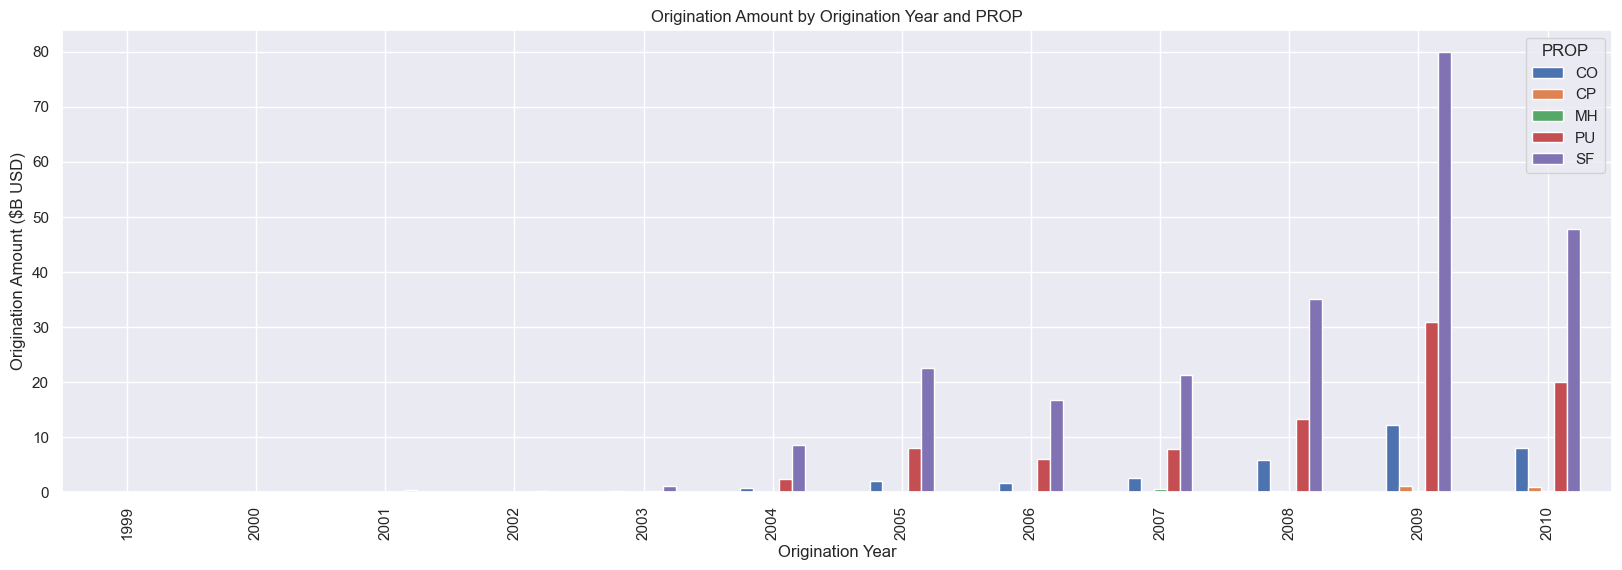

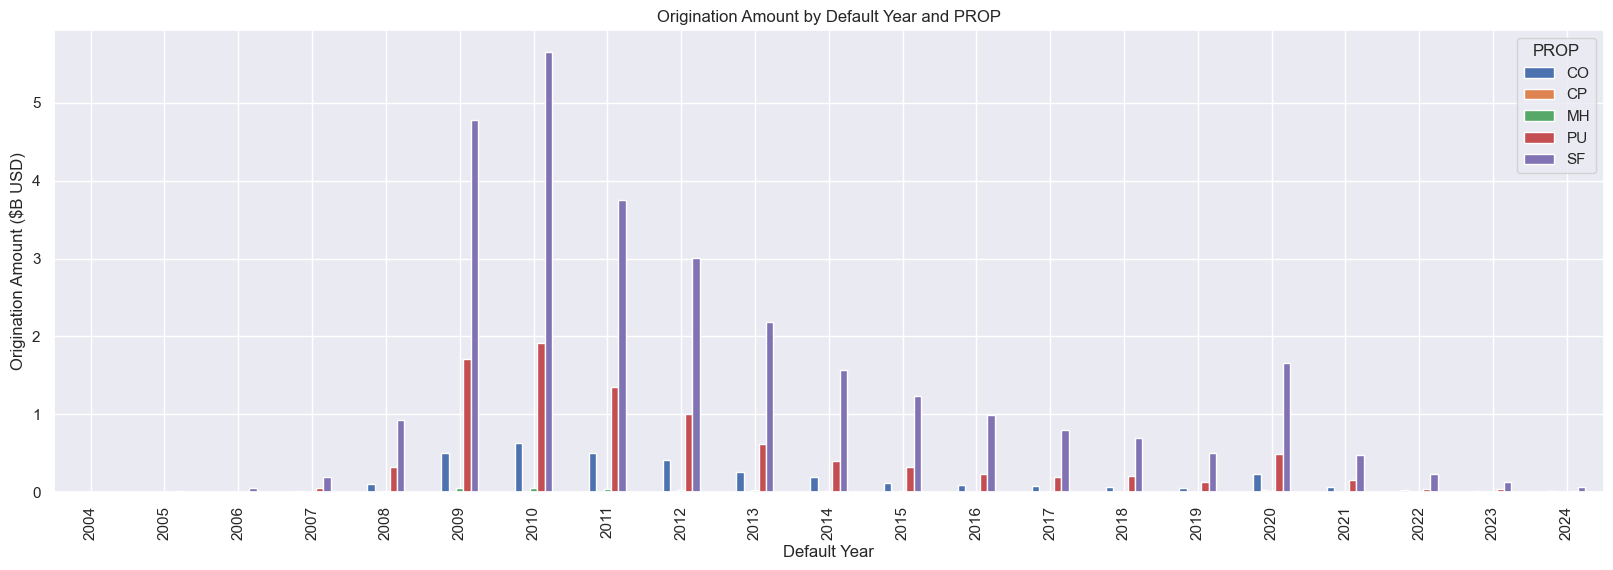

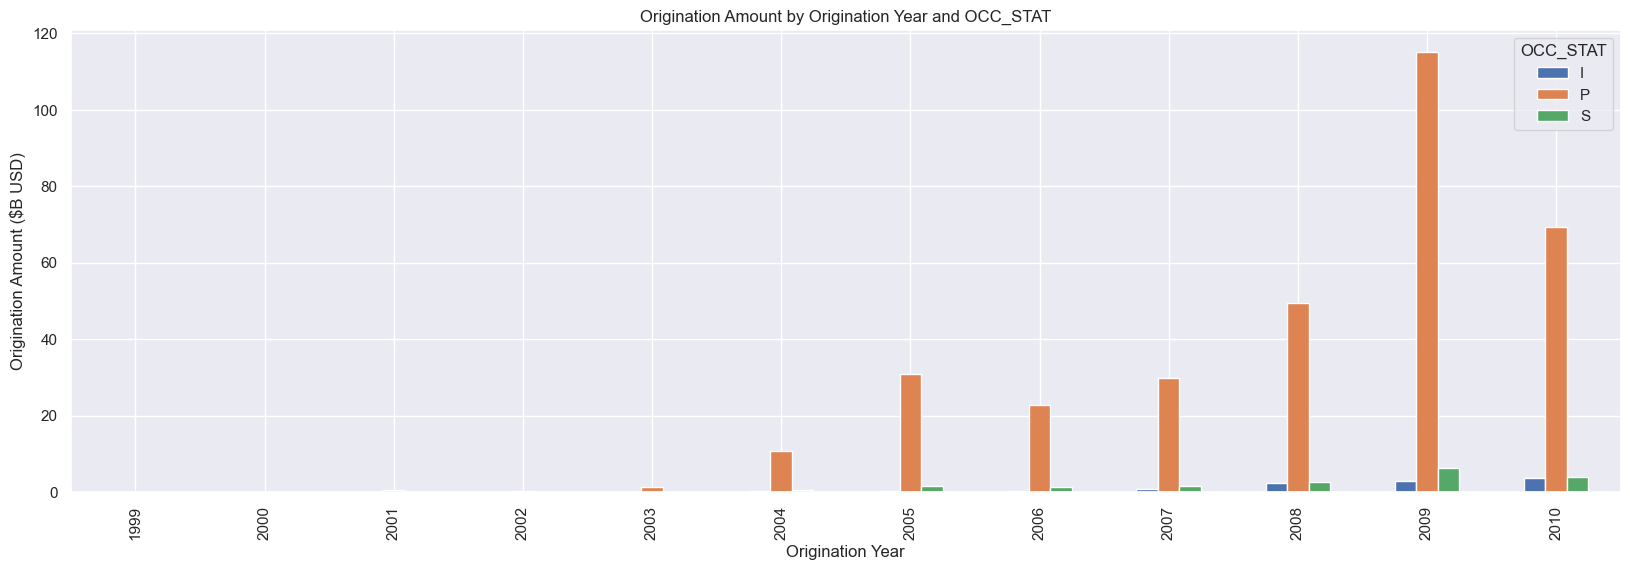

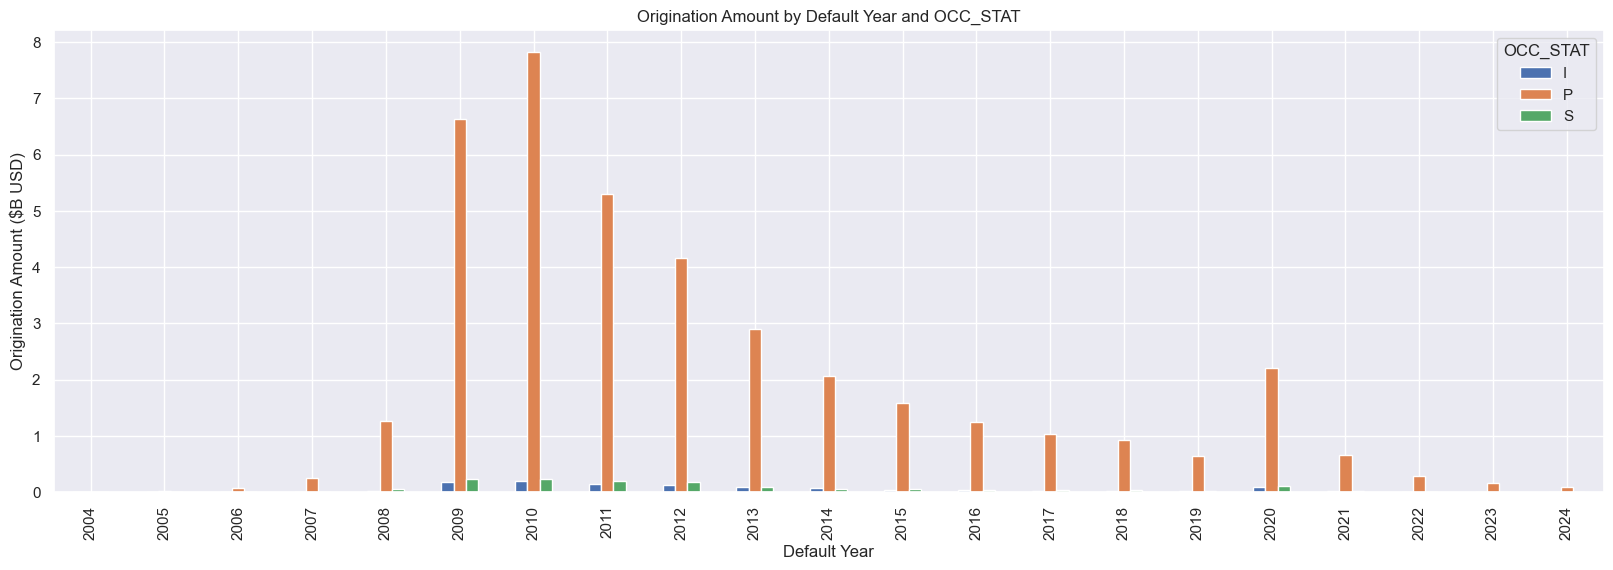

In [384]:
for col in ['RATE_BAND','TERM_BAND','OLTV_BAND','DTI_BAND','FIRST_FLAG','PURPOSE','PROP','OCC_STAT']:
    origination_cut(col)
    default_cut(col,1)
    print('=====================================================================================================================================')

# 🔗 Delinquency Rate vs Categorical vars

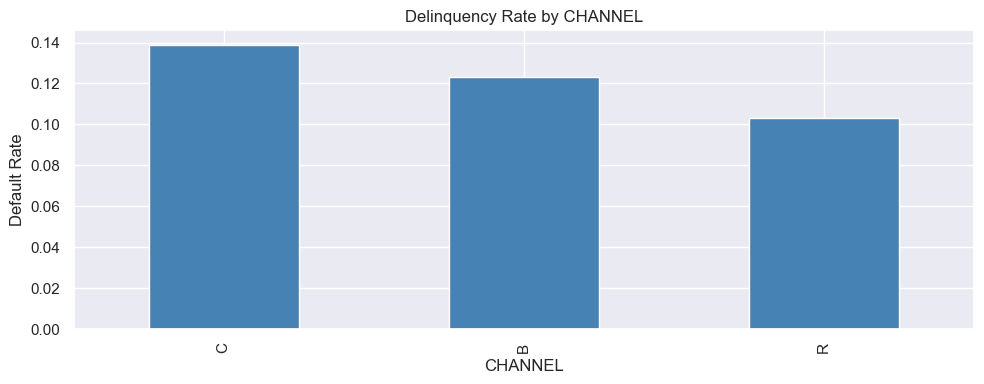

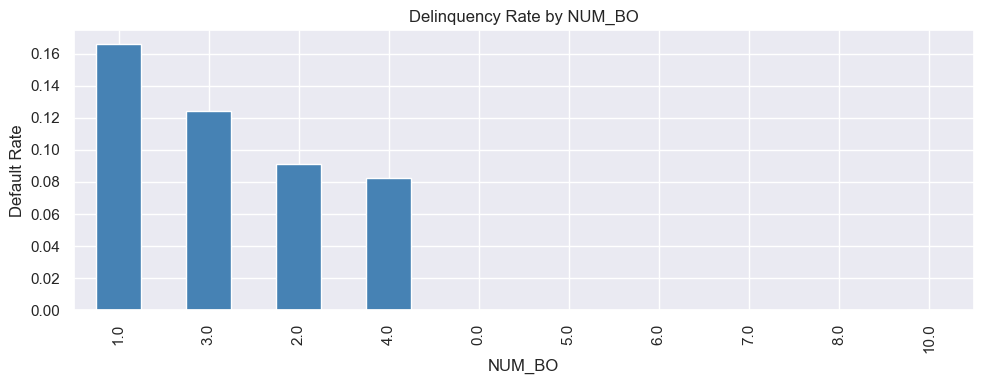

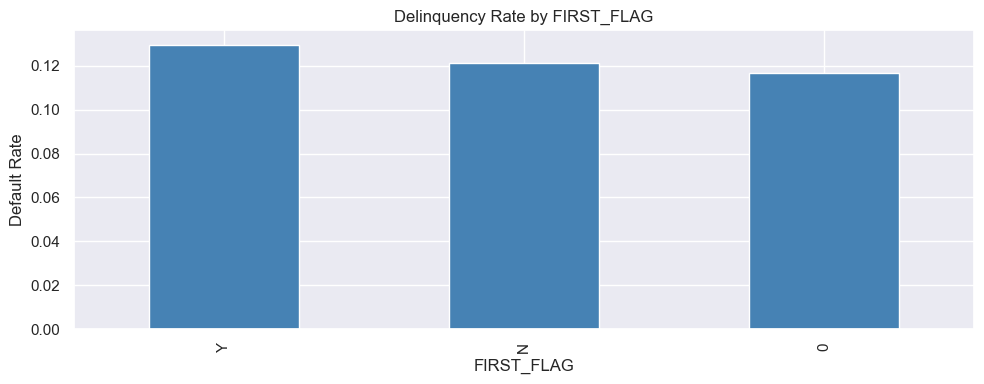

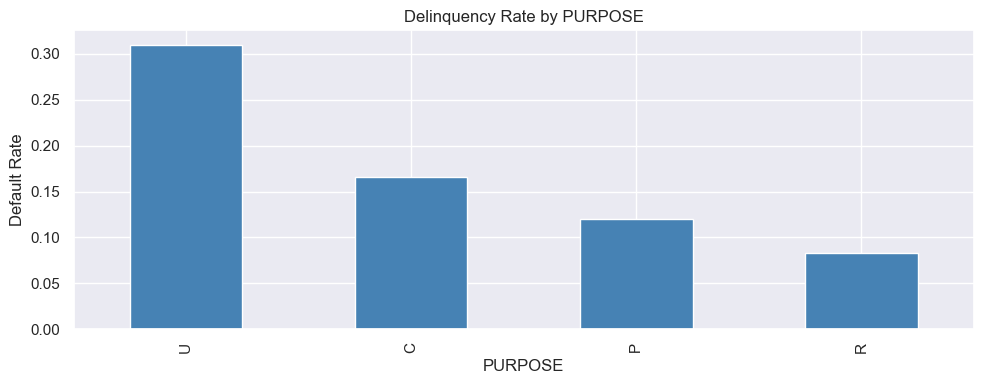

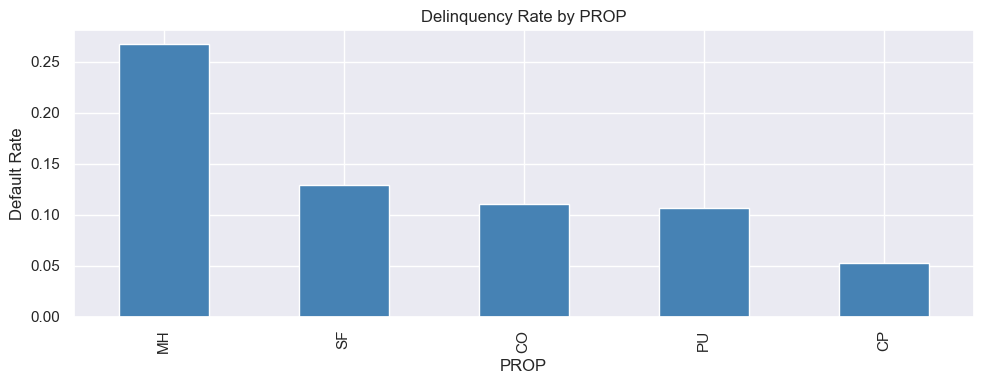

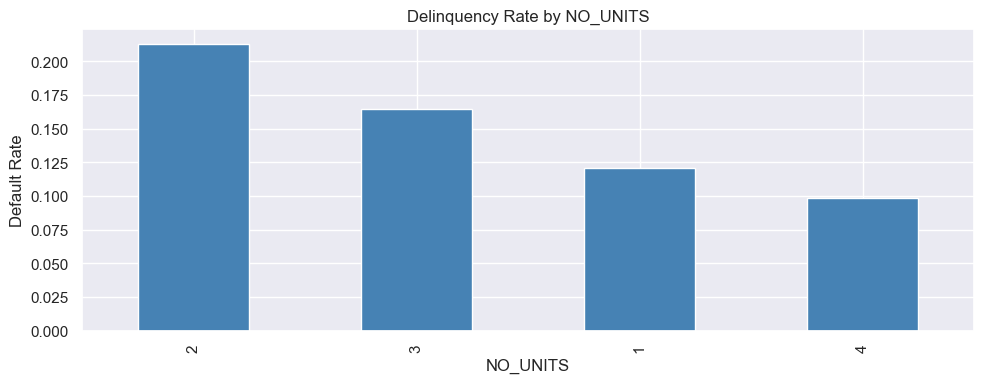

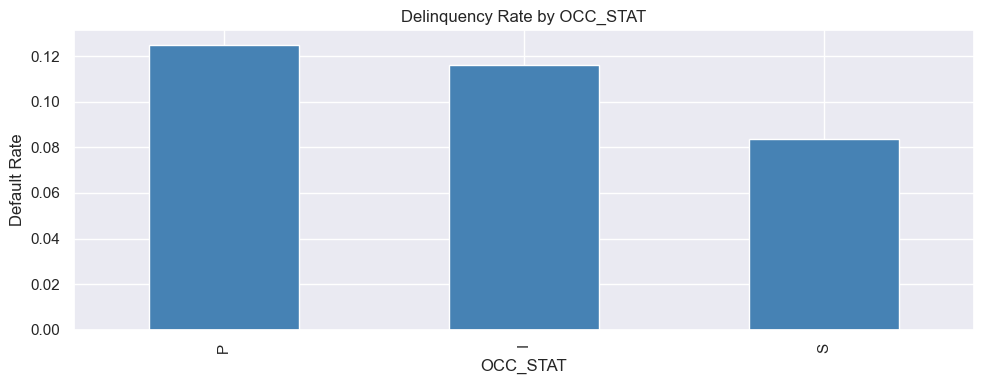

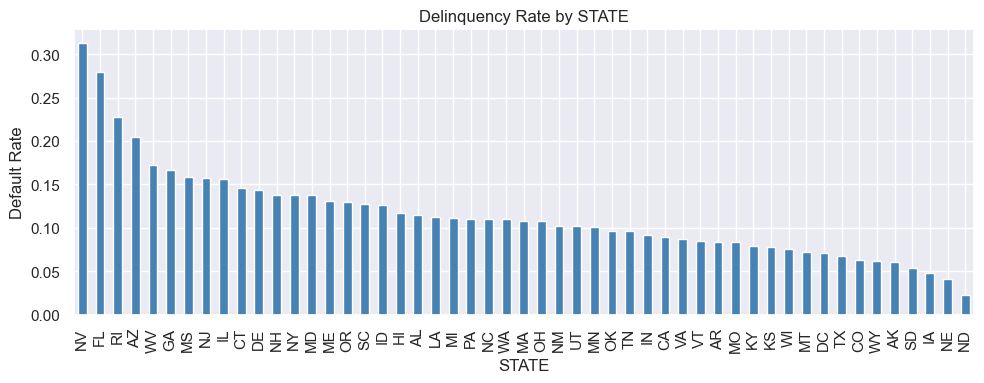

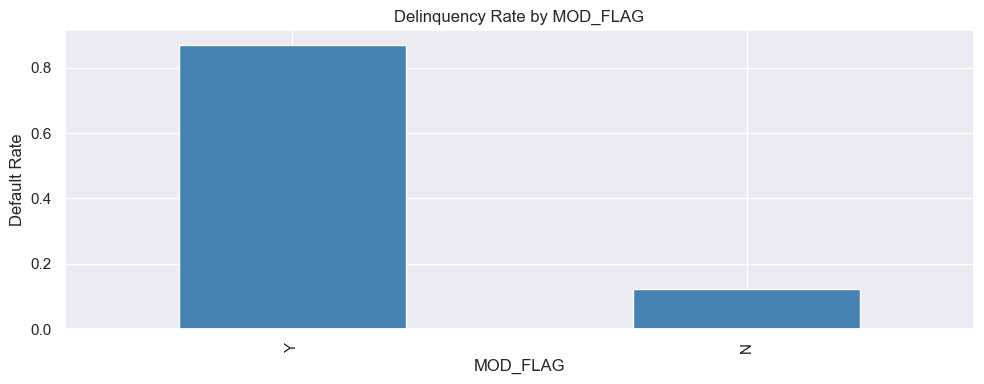

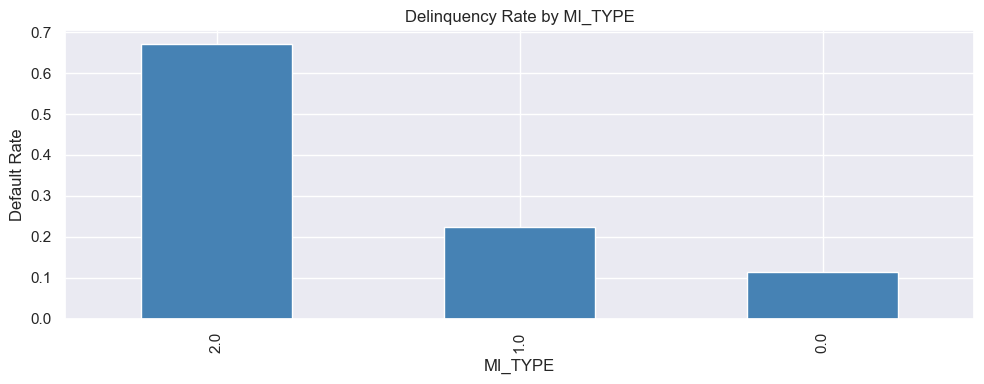

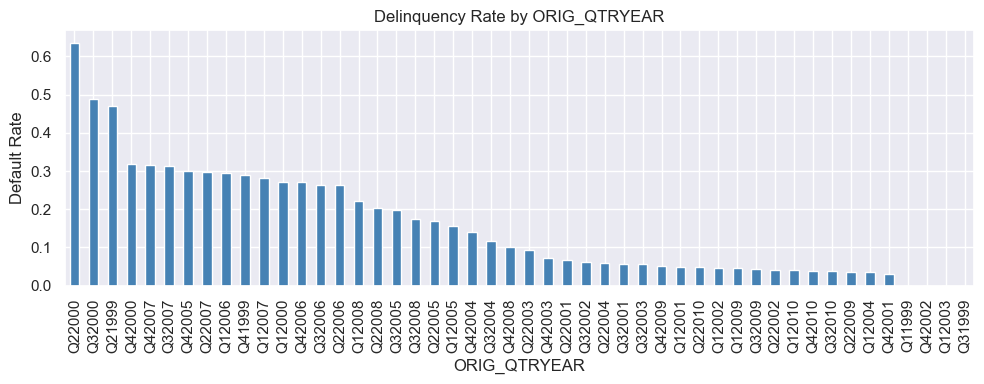

In [1159]:
for col in ['CHANNEL','NUM_BO','FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS',
       'OCC_STAT', 'STATE','MOD_FLAG','MI_TYPE',
       'ORIG_QTRYEAR']:
    purpose_default_rate = pd.concat([x[col], y], axis=1).groupby(col)['DLQ_STATUS'].mean().sort_values(ascending=False)
    purpose_default_rate.plot(kind='bar', color='steelblue', figsize=(10,4), title=f'Delinquency Rate by {col}')
    plt.ylabel("Default Rate")
    plt.tight_layout()
    plt.show()

# 🔗 Correlation Analysis

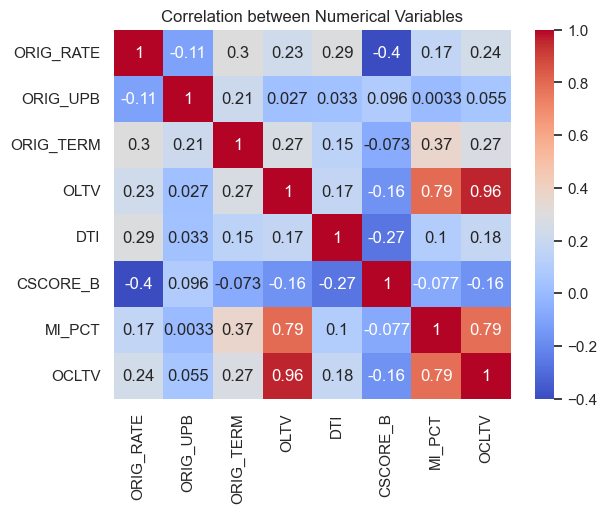

In [388]:
#let's check correlation b/w for continous vars
numeric_col=['ORIG_RATE', 'ORIG_UPB', 'ORIG_TERM', 'OLTV','DTI', 'CSCORE_B','MI_PCT','OCLTV']
sns.heatmap(df_main_new[numeric_col].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Variables")
plt.show()

In [389]:
#Above shows that we should drop one between OLTV and OCLTV to avoid multicollinearity

# 🔗 Data Structuring for model building

In [391]:
#First, let's add the bins. This helps with interpretability, and also helpful if scorecard is made later
x=df_main_new.drop(['LOAN_ID','CURR_RATE','CURRENT_UPB','ORIG_DATE','MATR_DT','MSA','ZIP','DLQ_STATUS','SERV_IND','DLQ4_PERIOD',
                   'ORIG_MONTH','ORIG_YEAR','ORIG_QTR','DLQ4_MONTH','DLQ4_YEAR','DLQ4_QTR','CSCORE_C','OCLTV'],axis=1)
y=df_main_new['DLQ_STATUS']

In [392]:
#Checking class imbalance in y
print('Proportion of defaults in data:', y.sum()/y.count())

Proportion of defaults in data: 0.12237557688557624


In [393]:
x=x.drop(['ORIG_TERM','OLTV','CSCORE_B','ORIG_RATE','DTI'],axis=1)

In [394]:
x.head()

,CHANNEL,ORIG_UPB,NUM_BO,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,MI_TYPE,ORIG_QTRYEAR,DLQ4_QTRYEAR,CUST_BAND,RATE_BAND,TERM_BAND,OLTV_BAND,DTI_BAND
0,R,29000.0,2.0,N,P,CO,1,S,OK,30.0,N,NaN,Q41999,00,Subprime,>7.5,300-400,>90%,>50%
1,R,27000.0,2.0,N,P,SF,1,P,GA,NaN,N,NaN,Q12000,00,Excellent,>7.5,100-200,70-80%,20-30%
2,R,39000.0,3.0,N,R,CO,1,P,FL,NaN,N,NaN,Q41999,00,Excellent,>7.5,300-400,60-70%,Missing
3,R,18000.0,1.0,N,R,SF,1,P,SC,NaN,N,NaN,Q12000,00,Excellent,>7.5,300-400,<60%,<20%
4,C,63000.0,2.0,N,P,CO,1,P,FL,NaN,N,NaN,Q41999,00,Prime,>7.5,300-400,70-80%,40-50%


In [395]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523049 entries, 0 to 1523048
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   CHANNEL       1523049 non-null  object 
 1   ORIG_UPB      1523049 non-null  float64
 2   NUM_BO        1523003 non-null  float64
 3   FIRST_FLAG    1522578 non-null  object 
 4   PURPOSE       1523049 non-null  object 
 5   PROP          1523049 non-null  object 
 6   NO_UNITS      1523049 non-null  int64  
 7   OCC_STAT      1523049 non-null  object 
 8   STATE         1523049 non-null  object 
 9   MI_PCT        199217 non-null   float64
 10  MOD_FLAG      1523049 non-null  object 
 11  MI_TYPE       110512 non-null   float64
 12  ORIG_QTRYEAR  1523049 non-null  object 
 13  DLQ4_QTRYEAR  1523049 non-null  object 
 14  CUST_BAND     1523049 non-null  object 
 15  RATE_BAND     1523049 non-null  object 
 16  TERM_BAND     1523049 non-null  object 
 17  OLTV_BAND     1523049 non-n

In [396]:
x['NUM_BO']=x['NUM_BO'].fillna(1)
x['FIRST_FLAG']=x['FIRST_FLAG'].fillna('N')
x['MI_TYPE']=x['MI_TYPE'].fillna(0)
x['MI_PCT']=x['MI_PCT'].fillna(0)

In [397]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523049 entries, 0 to 1523048
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   CHANNEL       1523049 non-null  object 
 1   ORIG_UPB      1523049 non-null  float64
 2   NUM_BO        1523049 non-null  float64
 3   FIRST_FLAG    1523049 non-null  object 
 4   PURPOSE       1523049 non-null  object 
 5   PROP          1523049 non-null  object 
 6   NO_UNITS      1523049 non-null  int64  
 7   OCC_STAT      1523049 non-null  object 
 8   STATE         1523049 non-null  object 
 9   MI_PCT        1523049 non-null  float64
 10  MOD_FLAG      1523049 non-null  object 
 11  MI_TYPE       1523049 non-null  float64
 12  ORIG_QTRYEAR  1523049 non-null  object 
 13  DLQ4_QTRYEAR  1523049 non-null  object 
 14  CUST_BAND     1523049 non-null  object 
 15  RATE_BAND     1523049 non-null  object 
 16  TERM_BAND     1523049 non-null  object 
 17  OLTV_BAND     1523049 non-n

# 🧠 Weight of Evidence (WOE) Encoding

In [399]:
# Let's calculate WOE and IV. Helps in feature selection and intepretability
def woe(var):
    df_temp=pd.concat([x,y],axis=1)
    var_woe=pd.DataFrame(df_temp.groupby([var])['DLQ_STATUS'].aggregate('sum'))
    var_woe.reset_index(inplace= True)
    var_woe.columns=[var,'BADS']
    var_woe['GOODS']=df_temp[var].count()-var_woe['BADS']
    var_tot_goods=var_woe['GOODS'].sum()
    var_tot_bads=var_woe['BADS'].sum()
    var_woe['DIST_BADS']=var_woe['BADS']/var_tot_bads
    var_woe['DIST_GOODS']=var_woe['GOODS']/var_tot_goods
    eps=1e-5 # For handling 0s
    var_woe['WOE']=np.log((var_woe['DIST_GOODS']+eps)/(var_woe['DIST_BADS']+eps))
    var_woe['IV_BIN']=(var_woe['DIST_GOODS']-var_woe['DIST_BADS'])*var_woe['WOE']
    var_iv=var_woe['IV_BIN'].sum()
    print(var_woe)
    print('==================')
    print(f'IV of {var}:',round(var_iv,3))
    print('===================')
    return var_iv

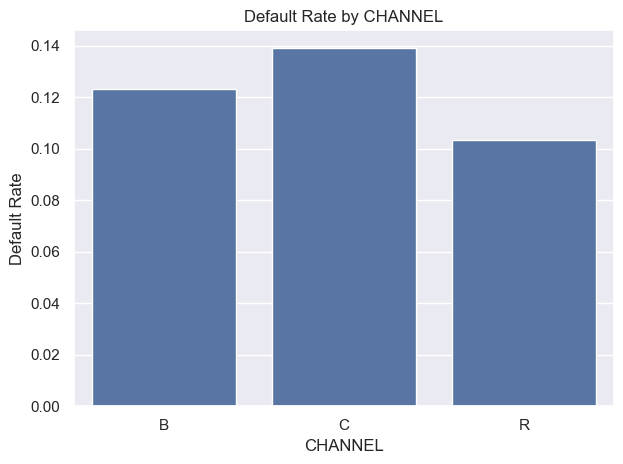

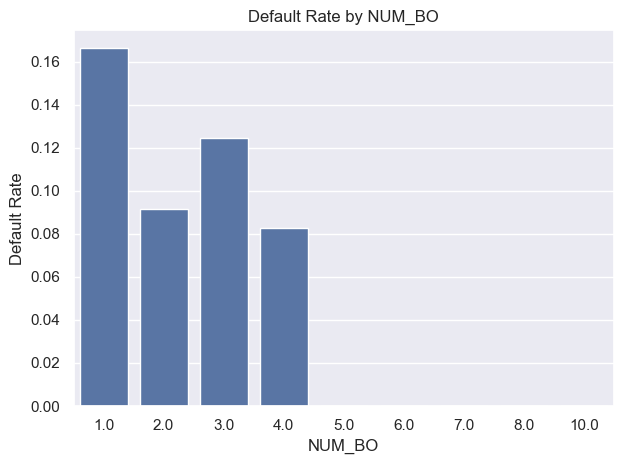

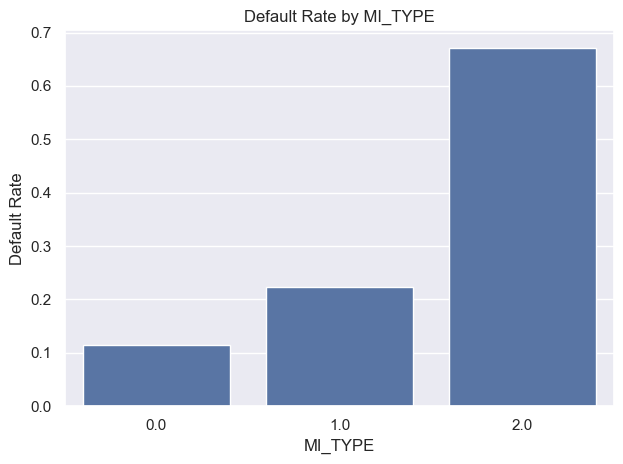

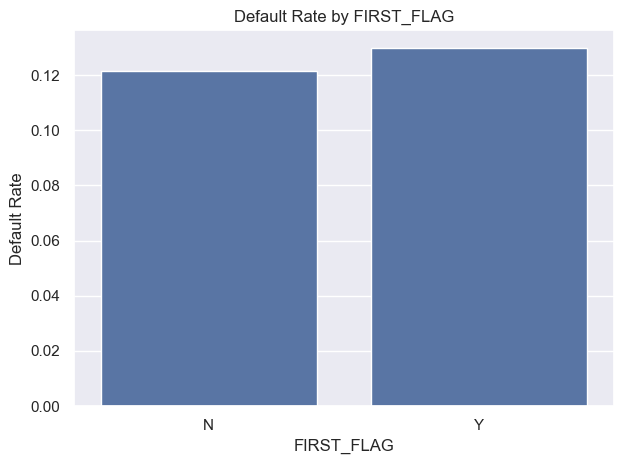

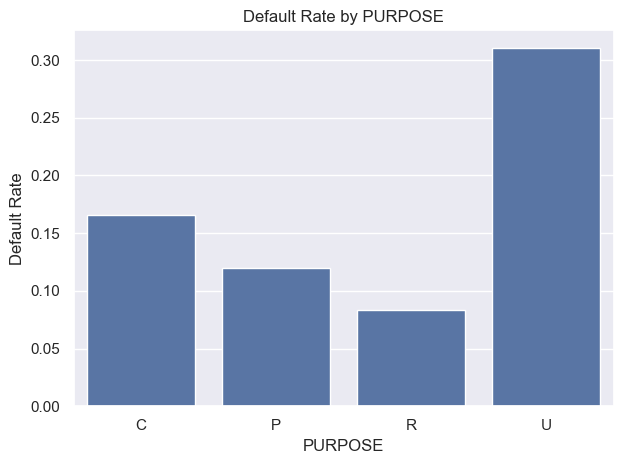

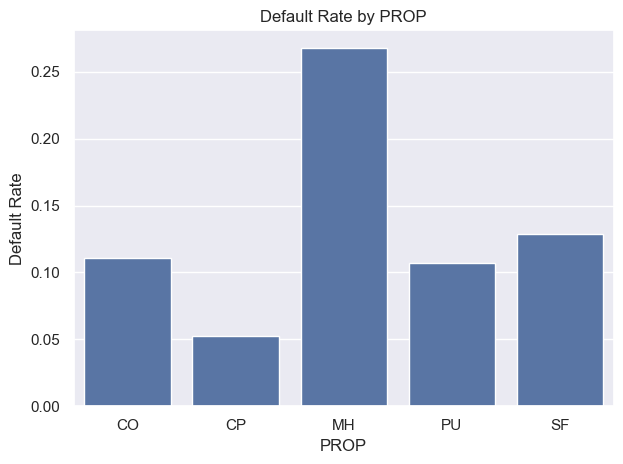

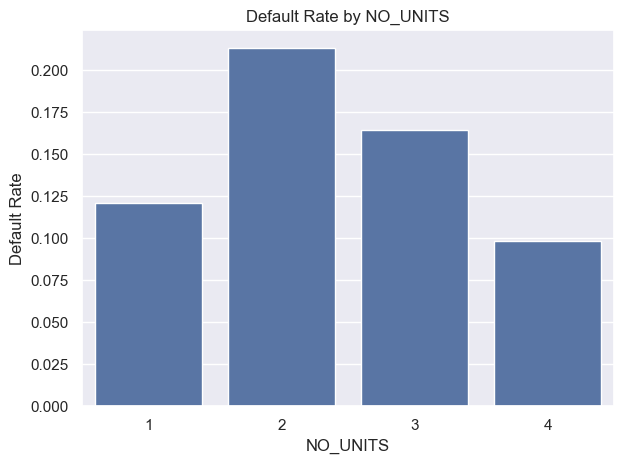

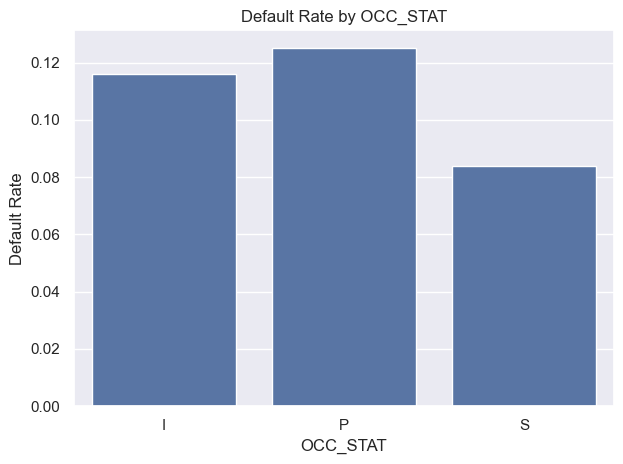

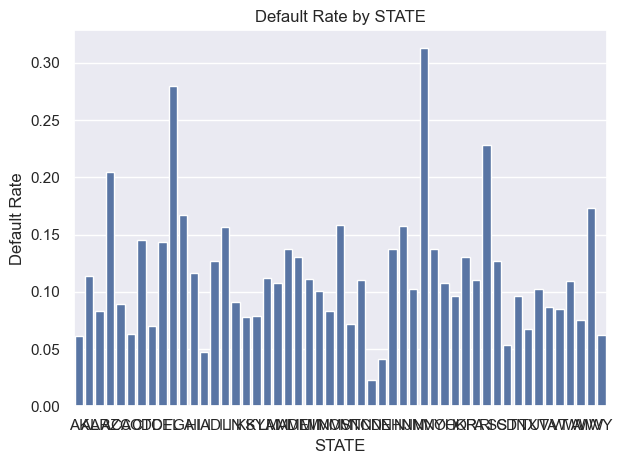

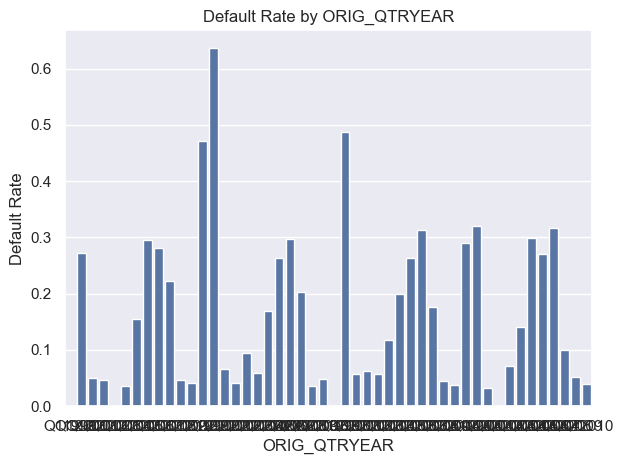

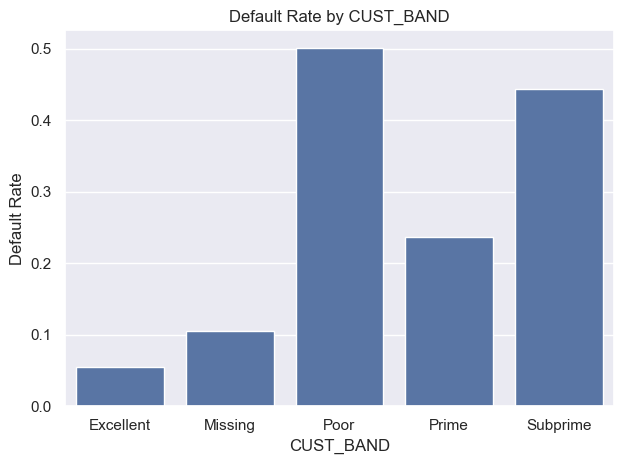

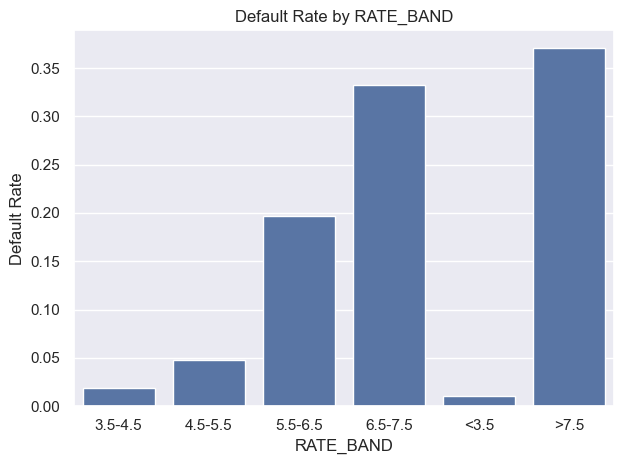

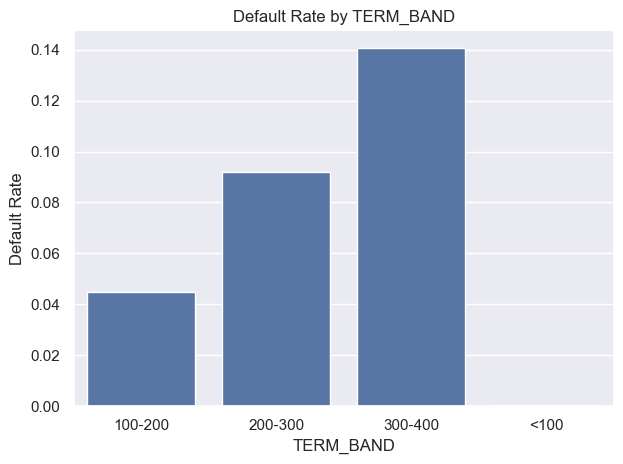

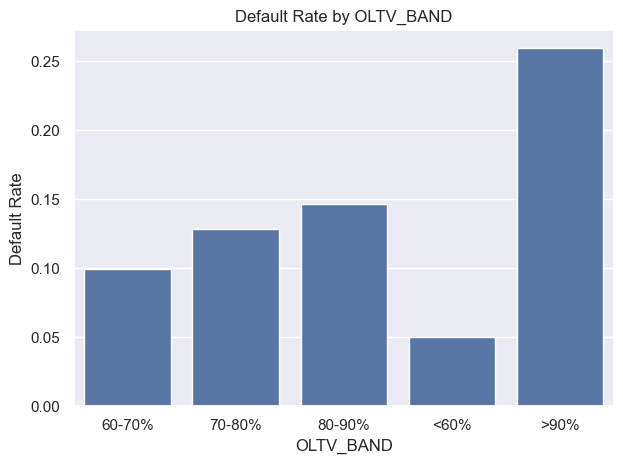

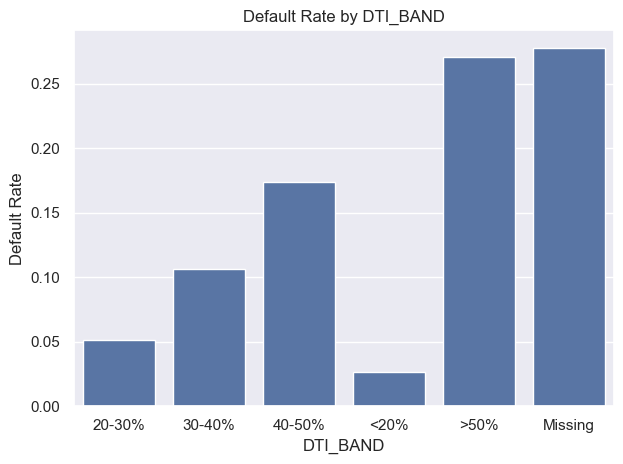

In [400]:
# Plot Bad Rate by categorical vars
for col in col_cat:
    df_temp = pd.concat([x[col], y], axis=1)
    bad_rate_by_oltv = df_temp.groupby(col)['DLQ_STATUS'].mean().reset_index()
    sns.barplot(x=col, y='DLQ_STATUS', data=bad_rate_by_oltv)
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [401]:
#Calculating WOE and IV for categorical vars
col_cat=['CHANNEL','NUM_BO','FIRST_FLAG','PURPOSE','PROP','NO_UNITS','OCC_STAT','STATE','MOD_FLAG','ORIG_QTRYEAR','CUST_BAND',
        'RATE_BAND','TERM_BAND','OLTV_BAND','DTI_BAND']

lst=[]
for col in col_cat:
    iv_col=woe(col)
    lst.append({'Feature':col,'IV':iv_col})

df_iv=pd.DataFrame(lst)
df_iv

  CHANNEL   BADS    GOODS  DIST_BADS  DIST_GOODS       WOE    IV_BIN
0       B  23338  1499711   0.125215    0.342184  1.005269  0.218112
1       C  98794  1424255   0.530056    0.324967 -0.489246  0.100339
2       R  64252  1458797   0.344729    0.332849 -0.035070  0.000417
IV of CHANNEL: 0.319
   NUM_BO    BADS    GOODS  DIST_BADS  DIST_GOODS       WOE    IV_BIN
0     1.0  104694  1418355   0.561711    0.104900 -1.677906  0.766487
1     2.0   80967  1442082   0.434410    0.106655 -1.404322  0.460274
2     3.0     596  1522453   0.003198    0.112599  3.558365  0.389289
3     4.0     127  1522922   0.000681    0.112633  5.093279  0.570203
4     5.0       0  1523049   0.000000    0.112643  9.329480  1.050898
5     6.0       0  1523049   0.000000    0.112643  9.329480  1.050898
6     7.0       0  1523049   0.000000    0.112643  9.329480  1.050898
7     8.0       0  1523049   0.000000    0.112643  9.329480  1.050898
8    10.0       0  1523049   0.000000    0.112643  9.329480  1.050898
IV 

,Feature,IV
0,CHANNEL,0.318868
1,NUM_BO,7.440743
2,FIRST_FLAG,0.843306
3,PURPOSE,1.864354
4,PROP,2.197619
5,NO_UNITS,4.057426
6,OCC_STAT,2.021565
7,STATE,1.378479
8,MOD_FLAG,4.387485
9,ORIG_QTRYEAR,2.634909


In [402]:
# Clean PURPOSE, since category U might cause instability. Combining it with R and calling it Others
x['PURPOSE']=x['PURPOSE'].replace('U','Others')
x['PURPOSE']=x['PURPOSE'].replace('R','Others')

In [403]:
woe('PURPOSE')

  PURPOSE   BADS    GOODS  DIST_BADS  DIST_GOODS       WOE    IV_BIN
0       C  79187  1443862   0.424859    0.329441 -0.254354  0.024270
1  Others  41332  1481717   0.221757    0.338078  0.421679  0.049050
2       P  65865  1457184   0.353383    0.332481 -0.060970  0.001274
IV of PURPOSE: 0.075


0.07459461018349346

In [404]:
# Clean PROP, since category CP might cause instability. Combining it with MH and calling it Others
x['PROP']=x['PROP'].replace('CP','Others')
x['PROP']=x['PROP'].replace('MH','Others')

In [405]:
woe('PROP')

     PROP    BADS    GOODS  DIST_BADS  DIST_GOODS       WOE    IV_BIN
0      CO   16312  1506737   0.087518    0.255128  1.069842  0.179316
1  Others    2684  1520365   0.014400    0.257435  2.882859  0.700636
2      PU   38047  1485002   0.204132    0.251448  0.208457  0.009863
3      SF  129341  1393708   0.693949    0.235989 -1.078584  0.493948
IV of PROP: 1.384


1.3837630249213793

In [406]:
x.columns

Index(['CHANNEL', 'ORIG_UPB', 'NUM_BO', 'FIRST_FLAG', 'PURPOSE', 'PROP',
       'NO_UNITS', 'OCC_STAT', 'STATE', 'MI_PCT', 'MOD_FLAG', 'MI_TYPE',
       'ORIG_QTRYEAR', 'DLQ4_QTRYEAR', 'CUST_BAND', 'RATE_BAND', 'TERM_BAND',
       'OLTV_BAND', 'DTI_BAND'],
      dtype='object')

In [407]:
x.head()

,CHANNEL,ORIG_UPB,NUM_BO,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,MI_TYPE,ORIG_QTRYEAR,DLQ4_QTRYEAR,CUST_BAND,RATE_BAND,TERM_BAND,OLTV_BAND,DTI_BAND
0,R,29000.0,2.0,N,P,CO,1,S,OK,30.0,N,0.0,Q41999,00,Subprime,>7.5,300-400,>90%,>50%
1,R,27000.0,2.0,N,P,SF,1,P,GA,0.0,N,0.0,Q12000,00,Excellent,>7.5,100-200,70-80%,20-30%
2,R,39000.0,3.0,N,Others,CO,1,P,FL,0.0,N,0.0,Q41999,00,Excellent,>7.5,300-400,60-70%,Missing
3,R,18000.0,1.0,N,Others,SF,1,P,SC,0.0,N,0.0,Q12000,00,Excellent,>7.5,300-400,<60%,<20%
4,C,63000.0,2.0,N,P,CO,1,P,FL,0.0,N,0.0,Q41999,00,Prime,>7.5,300-400,70-80%,40-50%


In [408]:
x=x.drop(['DLQ4_QTRYEAR','MOD_FLAG'],axis=1)  #to avoid data leakage

In [409]:
# Let's do WOE mapping for categorical vars
def woe_for_map(var):
    df_temp=pd.concat([x,y],axis=1)
    var_woe=pd.DataFrame(df_temp.groupby([var])['DLQ_STATUS'].aggregate('sum'))
    var_woe.reset_index(inplace= True)
    var_woe.columns=[var,'BADS']
    var_woe['GOODS']=df_temp[var].count()-var_woe['BADS']
    var_tot_goods=var_woe['GOODS'].sum()
    var_tot_bads=var_woe['BADS'].sum()
    var_woe['DIST_BADS']=var_woe['BADS']/var_tot_bads
    var_woe['DIST_GOODS']=var_woe['GOODS']/var_tot_goods
    eps=1e-5 # For handling 0s
    var_woe['WOE']=np.log((var_woe['DIST_GOODS']+eps)/(var_woe['DIST_BADS']+eps))
    return var_woe[[var,'WOE']]

x_final=x.copy()
col_cat=['CHANNEL','NUM_BO','MI_TYPE','FIRST_FLAG','PURPOSE','PROP','NO_UNITS','OCC_STAT','STATE','ORIG_QTRYEAR','CUST_BAND',
        'RATE_BAND','TERM_BAND','OLTV_BAND','DTI_BAND']
for col in col_cat:
    print(f'Mapping:{col}')
    df_var=woe_for_map(col)
    df_var.columns=[col,f'WOE_{col}']
    x_final=pd.DataFrame(pd.merge(x_final,df_var,on=col,how='left'))

Mapping:CHANNEL
Mapping:NUM_BO
Mapping:MI_TYPE
Mapping:FIRST_FLAG
Mapping:PURPOSE
Mapping:PROP
Mapping:NO_UNITS
Mapping:OCC_STAT
Mapping:STATE
Mapping:ORIG_QTRYEAR
Mapping:CUST_BAND
Mapping:RATE_BAND
Mapping:TERM_BAND
Mapping:OLTV_BAND
Mapping:DTI_BAND


In [410]:
x_final=x_final.drop(col_cat,axis=1)

In [411]:
x_final.head()

,ORIG_UPB,MI_PCT,WOE_CHANNEL,WOE_NUM_BO,WOE_MI_TYPE,WOE_FIRST_FLAG,WOE_PURPOSE,WOE_PROP,WOE_NO_UNITS,WOE_OCC_STAT,WOE_STATE,WOE_ORIG_QTRYEAR,WOE_CUST_BAND,WOE_RATE_BAND,WOE_TERM_BAND,WOE_OLTV_BAND,WOE_DTI_BAND
0,29000.0,30.0,-0.035070,-1.404322,-1.026459,-0.615431,-0.060970,1.069842,-1.449242,2.239501,1.295378,3.312435,-0.200273,2.627157,-1.381957,-0.028061,-0.355800
1,27000.0,0.0,-0.035070,-1.404322,-1.026459,-0.615431,-0.060970,-1.078584,-1.449242,-1.096383,-0.960646,3.305410,-0.488221,2.627157,1.384114,-0.161085,0.551713
2,39000.0,0.0,-0.035070,3.558365,-1.026459,-0.615431,0.421679,1.069842,-1.449242,-1.096383,-1.944780,3.312435,-0.488221,2.627157,-1.381957,0.537108,1.789344
3,18000.0,0.0,-0.035070,-1.677906,-1.026459,-0.615431,0.421679,-1.078584,-1.449242,-1.096383,-0.090494,3.305410,-0.488221,2.627157,-1.381957,0.677301,2.117145
4,63000.0,0.0,-0.489246,-1.404322,-1.026459,-0.615431,-0.060970,1.069842,-1.449242,-1.096383,-1.944780,3.312435,-0.748753,2.627157,-1.381957,-0.161085,-0.784889


# Model Development

In [413]:
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.3,random_state=42)

In [437]:
#Scaling continuous vars
cont_cols=['ORIG_UPB','MI_PCT']
scaler=StandardScaler()
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_test[cont_cols] = scaler.transform(x_test[cont_cols])

In [438]:
model=LogisticRegression(max_iter=1000)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(model,x_train,y_train,cv=skf,scoring='roc_auc')
print("Fold-wise AUC:", scores)
print("Average AUC:", np.mean(scores))

Fold-wise AUC: [0.77516631 0.77780161 0.77809302 0.7793602  0.77908173]
Average AUC: 0.7779005730150779


In [439]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Model Validation

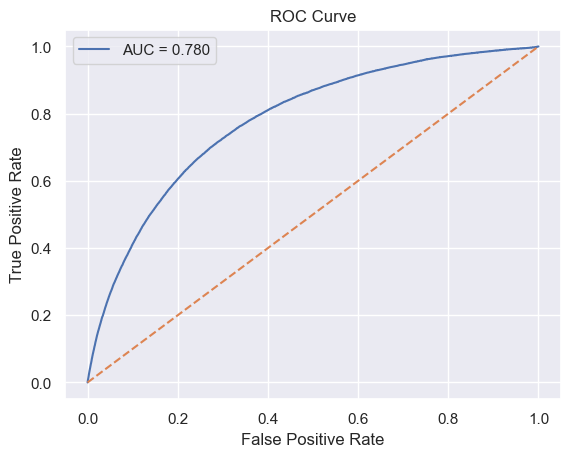

In [443]:
y_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig(f"ghub/my-portfolio/assets/images/results/roc.png",dpi=300,bbox_inches="tight")
plt.show()

In [280]:
#let's look at coefficients
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
11,WOE_ORIG_QTRYEAR,-0.839457
6,WOE_PURPOSE,-0.668917
15,WOE_OLTV_BAND,-0.616766
3,WOE_NUM_BO,-0.574189
16,WOE_DTI_BAND,-0.452170
12,WOE_CUST_BAND,0.383707
13,WOE_RATE_BAND,-0.332499
1,MI_PCT,0.327618
10,WOE_STATE,-0.305580
5,WOE_FIRST_FLAG,-0.241910



Accuracy : 0.878
Precision: 0.511
Recall   : 0.044
TPR      : 0.044
FPR      : 0.006


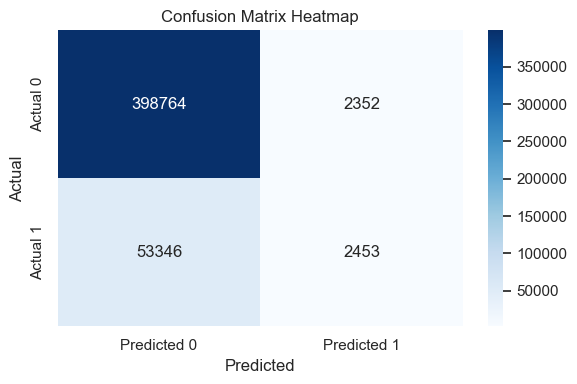

In [449]:
#Let's look ar more model evaluation metrics

#Confusion Matrix
y_pred_proba=model.predict_proba(x_test)[:,1]

threshold = 0.5
y_pred_class = (y_pred_proba >= threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Performance metrics
print(f"\nAccuracy : {accuracy_score(y_test, y_pred_class):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_class):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_class):.3f}")
print(f"TPR      : {tp / (tp + fn):.3f}")
print(f"FPR      : {fp / (fp + tn):.3f}")

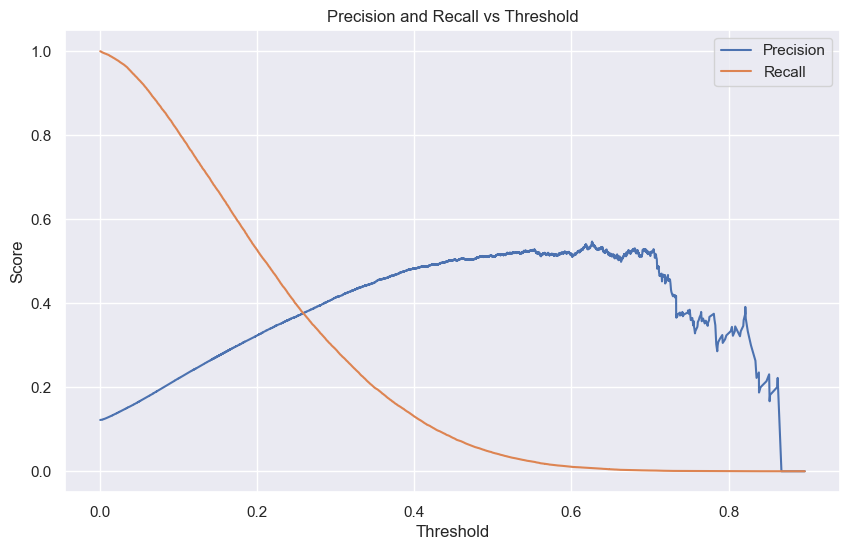

In [451]:
#Recall seems too low. Optimising threshold to improve recall
# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plotting precision-recall vs threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.savefig(f"ghub/my-portfolio/assets/images/results/prec_v_rec.png",dpi=300,bbox_inches="tight")
plt.show()


Accuracy : 0.744
Precision: 0.274
Recall   : 0.668
TPR      : 0.668
FPR      : 0.246


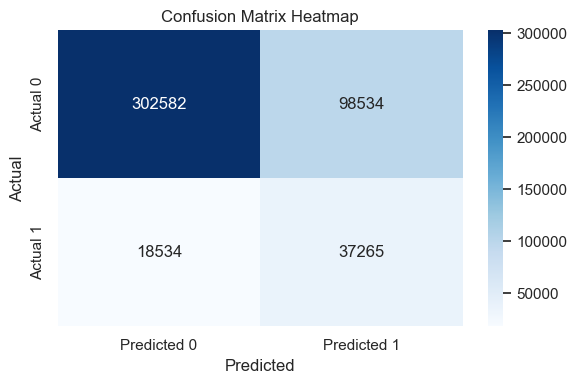

In [453]:
#Let's do threshold at 0.2

threshold = 0.15
y_pred_class = (y_pred_proba >= threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()

#print("Confusion Matrix:")
#print(cm)

# Performance metrics
print(f"\nAccuracy : {accuracy_score(y_test, y_pred_class):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_class):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_class):.3f}")
print(f"TPR      : {tp / (tp + fn):.3f}")
print(f"FPR      : {fp / (fp + tn):.3f}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(f"ghub/my-portfolio/assets/images/results/cm_mat.png",dpi=300,bbox_inches="tight")

In [288]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_statistic = max(tpr - fpr)

print(f"KS Statistic: {ks_statistic:.3f}")

KS Statistic: 0.427


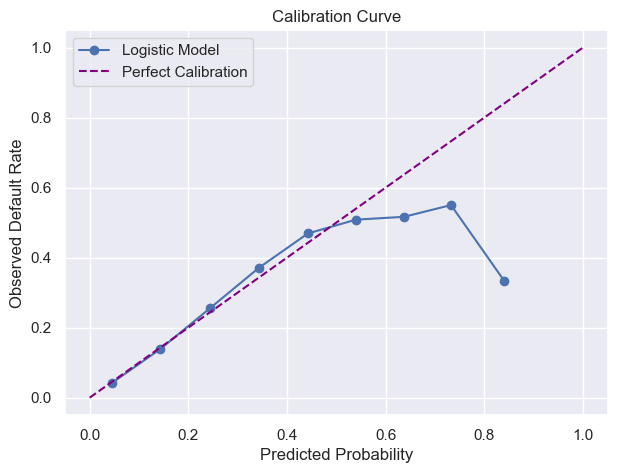

In [457]:
#Let's look at calibration


# Probabilities predicted by the model
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

plt.figure(figsize=(7, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='purple', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Default Rate')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.savefig(f"ghub/my-portfolio/assets/images/results/calib.png",dpi=300,bbox_inches="tight")
plt.show()

In [270]:
#Final model predictions

# Save predicted probabilities
x_test_probs = model.predict_proba(x_test)[:, 1]

# Create a final DataFrame with scores and flags
results_df = pd.DataFrame({
    'Predicted_PD': x_test_probs,
    'Actual_Default': y_test
})

results_df.head()

,Predicted_PD,Actual_Default
554525,0.293063,0
1307678,0.025350,0
475374,0.089582,0
1333488,0.144899,0
1153306,0.112557,0


In [272]:
#Portfolio level summary
results_df['ORIG_QTRYEAR'] = df_main_new['ORIG_QTRYEAR']  # map back if needed

summary = results_df.groupby('ORIG_QTRYEAR').agg({
    'Predicted_PD': 'mean',
    'Actual_Default': 'mean'
}).reset_index()

summary.columns = ['ORIG_QTRYEAR', 'Avg_Predicted_PD', 'Observed_Default_Rate']
display(summary)


,ORIG_QTRYEAR,Avg_Predicted_PD,Observed_Default_Rate
0,Q11999,0.000117,0.000000
1,Q12000,0.003605,0.232394
2,Q12001,0.001059,0.076923
3,Q12002,0.002001,0.040984
4,Q12003,0.000475,0.000000
5,Q12004,0.018018,0.037487
6,Q12005,0.117225,0.151988
7,Q12006,0.212175,0.295018
8,Q12007,0.166441,0.281537
9,Q12008,0.199246,0.217958
